# Latar Belakang

Sebuah perusahaan ritel sedang melakukan riset pasar (market research). Perusahaan ingin membuat bisnisnya lebih efektif dan efisien dengan menargetkan produk berdasarkan karakter pelanggannya. Dengan membuat model bisnis yang lebih efektif dan efisien, perusahaan dapat memperoleh keuntungan yang lebih maksimal. Oleh karena itu, data analyst di perusahaan tersebut ditugaskan untuk mengetahui karakteristik pelanggan, produk terjual, kebiasaan membeli, dan respon pelanggan terhadap promosi yang diberikan oleh perusahaan. 

# Pernyataan Masalah

Pihak perusahaan ingin membuat model bisnis yang lebih efektif dan efisien. Dalam membuat analisa, kita perlu berangkat dari beberapa pertanyaan agar dapat menjawab keinginan perusahaan. 

    1. Bagaimana karakteristik pelanggan?
    2. Apakah ada produk yang membutuhkan prioritas pemasaran?
    3. Bagaimana kebiasaan pelanggan?
    4. Bagaimana bentuk promosi yang lebih tepat sasaran?

# Import Library

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import webbrowser
webbrowser.open("http://www.example.com")

True

# Data 

Tahapan analisa akan dimulai dengan memuat dataset terlebih dahulu. Dataset yang akan digunakan berjudul Dataset Customer Personality Analysis. Dataset tersebut dapat diakses melalui <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">link ini.</a>

In [80]:
df = pd.read_csv('marketing_campaign.csv')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,...,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,...,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,...,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,0,0,0,0,5,3,6,5,3,11


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,...,0,0,0,0,9,3,4,5,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,...,0,0,0,0,8,2,5,7,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,...,0,1,0,0,2,3,13,6,3,11
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,...,0,0,0,0,6,5,10,3,3,11
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,0,...,0,0,0,1,3,1,4,7,3,11


Dataset marketing_campaign berisi informasi mulai dari identitas , penghasil per tahun, dan data pembelian pelanggan. Terdapat 14 kolom di dalam dataset, yaitu:

    1. ID: Nomor induk kependudukan pelanggan.
    2. Year_Birth: Tahun lahir pelanggan.
    3. Education: Latar pendidikan pelanggan.
    4. Marital Status: Status pernikahan pelanggan.
    5. Income: Penghasilan per tahun pelanggan.
    6. Kidhome: Jumlah anak (anak kecil) yang dimiliki pelanggan.
    7. Teenhome: Jumlah anak (remaja) yang dimiliki pelanggan.
    8. Dt_Customer: Tanggal pelanggan berlangganan dengan perusahaan.
    9. Recency: Jumlah hari sejak pembelian terakhir pelanggan
    10. Complain: Komplen yang dilakukan pelanggan dalam 2 tahun terakhir (1 untuk pernah komplen, 0 untuk tidak pernah).
    11. MntWines: Jumlah pembelian produk wine dalam 2 tahun terakhir.
    12. MntFruits: Jumlah pembelian produk buah-buahan dalam 2 tahun terakhir.
    13. MntMeatProducts: Jumlah pembelian produk daging dalam 2 tahun terakhir.
    14. MntFishProducts: Jumlah pembelian produk ikan dalam 2 tahun terakhir.
    15. MntSweetProducts: Jumlah pembelian produk permen dalam 2 tahun terakhir.
    16. MntGoldProds: Jumlah pembelian produk emas dalam 2 tahun terakhir.
    17. NumDealsPurchases: Jumlah pembelian pelanggan dengan diskon.
    18. AcceptedCmp1: Respon pelanggan terhadap promosi pertama (1 untuk iya, 0 untuk tidak).
    19. AcceptedCmp2: Respon pelanggan terhadap promosi kedua (1 untuk iya, 0 untuk tidak).
    20. AcceptedCmp3: Respon pelanggan terhadap promosi ketiga (1 untuk iya, 0 untuk tidak).
    21. AcceptedCmp4: Respon pelanggan terhadap promosi keempat (1 untuk iya, 0 untuk tidak).
    22. AcceptedCmp5: Respon pelanggan terhadap promosi kelima (1 untuk iya, 0 untuk tidak).
    23. Response: Respon pelanggan terhadap promosi terakhir (1 untuk iya, 0 untuk tidak).
    24. NumWebPurchases: Jumlah pembelian pelanggan melalui web.
    25. NumCatalogPurchases: Jumlah pembelian pelanggan melalui katalog. 
    26. NumStorePurchases: Jumlah pembelian pelanggan di toko.
    27. NumWebVisitsMonth: Jumlah kunjungan web yang dilakukan pelanggan dalam sebulan terakhir.
    28. Z_CostContact: Tidak diketahui (Tidak terdapat penjelasan pada Kaggle).
    29. Z_Revenue: Tidak diketahui (Tidak terdapat penjelasan pada Kaggle).

# Data Understanding

Sebagai langkah pertama, kita perlu memahami terlebih dahulu data yang kita miliki. Tahapan memahami data dinamakan Data Understanding. Proses ini berguna untuk mengetahui apakah terdapat anomali di dalam dataset. Jika kita sudah mengetahui anomali yang ada, kita dapat menangani data sesuai dengan masalah yang dimiliki. Penanganan anomali harus memiliki dasar argumen yang sesuai dengan domain knowledge dan statistika.

In [81]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Complain             2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-nul

In [82]:
display(df.describe(), df.describe(include= object))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,0.009375,303.935714,26.302232,166.950000,...,0.072768,0.074554,0.072768,0.149107,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,0.096391,336.597393,39.773434,225.715373,...,0.259813,0.262728,0.259813,0.356274,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [83]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\Khaesyar\AppData\Local\Temp\ipykernel_12108\2533891001.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,Complain,2,"[0, 1]"


Dari hasil paparan di atas, kita dapat melihat:

    1. Beberapa data dalam kolom perlu diformat ulang, seperti pada kolom Education dan Marital Status.
    2. Pada kolom Income terdapat beberapa data yang kosong, terlihat dari data yang bertuliskan 'nan'.
    3. Data pada kolom ID, Z_CostContact, dan Z_Revenue tidak memiliki relevansi dalam analisa data.
    4. Kolom Dt_Customer, Recency, dan Complain juga kurang memiliki relevansi dalam analisa data

# Data Cleaning

## Format Data

In [84]:
df['Education'] = df['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgraduate', 'Master':'Postgraduate', '2n Cycle':'Postgraduate', 'Basic':'Undergraduate'})
df['Education'].unique()
df['Education'].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate    54  
Name: Education, dtype: int64

In [85]:
df['Marital_Status'] = df['Marital_Status'].replace({'Together':'Married', 'Absurd':'Single', 'Divorced':'Single', 'Alone':'Single', 'YOLO':'Single', 'Widow':'Single'})
df['Marital_Status'].unique()
df['Marital_Status'].value_counts()

Married    1444
Single     796 
Name: Marital_Status, dtype: int64

In [86]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [87]:
df['Age'] = df['Year_Birth'].apply(lambda x : 2015 - x)
Age = df['Age']

def grouping (Age):
    if Age <= 22:
        return('Junior Adult')
    elif Age <= 39:
        return('Adult')
    elif Age <= 59:
        return('Senior Adult')
    elif Age >= 60:
        return('Elder')

df['Age_Group'] = df['Age'].apply(grouping)
df['Age_Group'].value_counts()

Senior Adult    1177
Adult           680 
Elder           368 
Junior Adult    15  
Name: Age_Group, dtype: int64

In [88]:
Income = df['Income']

def grouping2 (Income):
    if Income < 35000:
        return('Low Income')
    elif Income < 70000:
        return('Middle Income')
    elif Income >= 70000:
        return('Upper Income')
df['Income_Group'] = df['Income'].apply(grouping2)
df['Income_Group'].value_counts()

Middle Income    1159
Low Income       549 
Upper Income     508 
Name: Income_Group, dtype: int64

Menyesuaikan dengan kebutuhan analisa data, diperlukan beberapa kolom baru berdasarkan data kolom eksisting. Berapa kolom baru terdiri dari kolom Total_Children, Age_Group, Income_Group, dan Spending. Berikut penjelasannya:

    1. Kolom Total_Children merupakan hasil penjumlahan dari kolom Kidhome dan Teenhome. 
    2. Kolom Age_Group adalah hasil pengelompokan umur, terdiri dari Junior Adult (19 - 22 tahun), Adult (23 - 39 tahun), Senior Adult (40 - 59 Tahun), dan Elder (60 tahun ke atas). Kolom Age_Group dibuat dengan asumsi analisa data dibuat pada tahun 2015. Sehingga rumusnya adalah tahun 2015 dikurang kolom Year_Birth (tahun lahir masing-masing pelanggan).
    3. Kolom Income_Group merupakan hasil pengelompokan penghasilan per tahun, terdiri dari Lower Income (< $35.000), Middle Income ($35.000 - $69.999), dan Upper Income ($70.000 ke atas). 

## Duplicate Data

In [89]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Pada dataset tidak ditemukan data duplikat.

## Missing Value

In [90]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
Complain               0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
Response               0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Total_Children         0.000000
Age                    0.000000
Age_Grou

In [91]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
Complain               0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
AcceptedCmp1           0 
AcceptedCmp2           0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
Response               0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
Z_CostContact          0 
Z_Revenue              0 
Total_Children         0 
Age                    0 
Age_Group              0 
Income_Group           24
dtype: int64

In [92]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Total_Children,Age,Age_Group,Income_Group
10,1994,1983,Graduate,Married,NaN,1,0,15-11-2013,11,0,...,1,0,2,7,3,11,1,32,Adult,None
27,5255,1986,Graduate,Single,NaN,1,0,20-02-2013,19,0,...,27,0,0,1,3,11,1,29,Adult,None
43,7281,1959,Postgraduate,Single,NaN,0,0,05-11-2013,80,0,...,1,3,4,2,3,11,0,56,Senior Adult,None
48,7244,1951,Graduate,Single,NaN,2,1,01-01-2014,96,0,...,2,1,4,6,3,11,3,64,Elder,None
58,8557,1982,Graduate,Single,NaN,1,0,17-06-2013,57,0,...,2,0,3,6,3,11,1,33,Adult,None
71,10629,1973,Postgraduate,Married,NaN,1,0,14-09-2012,25,0,...,3,0,3,8,3,11,1,42,Senior Adult,None
90,8996,1957,Postgraduate,Married,NaN,2,1,19-11-2012,4,0,...,7,2,8,9,3,11,3,58,Senior Adult,None
91,9235,1957,Graduate,Single,NaN,1,1,27-05-2014,45,0,...,1,0,2,7,3,11,2,58,Senior Adult,None
92,5798,1973,Postgraduate,Married,NaN,0,0,23-11-2013,87,0,...,2,4,8,1,3,11,0,42,Senior Adult,None
128,8268,1961,Postgraduate,Married,NaN,0,1,11-07-2013,23,0,...,6,1,7,6,3,11,1,54,Senior Adult,None


In [93]:
df[df['Income_Group'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Total_Children,Age,Age_Group,Income_Group
10,1994,1983,Graduate,Married,NaN,1,0,15-11-2013,11,0,...,1,0,2,7,3,11,1,32,Adult,None
27,5255,1986,Graduate,Single,NaN,1,0,20-02-2013,19,0,...,27,0,0,1,3,11,1,29,Adult,None
43,7281,1959,Postgraduate,Single,NaN,0,0,05-11-2013,80,0,...,1,3,4,2,3,11,0,56,Senior Adult,None
48,7244,1951,Graduate,Single,NaN,2,1,01-01-2014,96,0,...,2,1,4,6,3,11,3,64,Elder,None
58,8557,1982,Graduate,Single,NaN,1,0,17-06-2013,57,0,...,2,0,3,6,3,11,1,33,Adult,None
71,10629,1973,Postgraduate,Married,NaN,1,0,14-09-2012,25,0,...,3,0,3,8,3,11,1,42,Senior Adult,None
90,8996,1957,Postgraduate,Married,NaN,2,1,19-11-2012,4,0,...,7,2,8,9,3,11,3,58,Senior Adult,None
91,9235,1957,Graduate,Single,NaN,1,1,27-05-2014,45,0,...,1,0,2,7,3,11,2,58,Senior Adult,None
92,5798,1973,Postgraduate,Married,NaN,0,0,23-11-2013,87,0,...,2,4,8,1,3,11,0,42,Senior Adult,None
128,8268,1961,Postgraduate,Married,NaN,0,1,11-07-2013,23,0,...,6,1,7,6,3,11,1,54,Senior Adult,None


In [94]:
df.dropna(subset=['Income'],inplace=True)


Seperti yang dijelaskan sebelumnya, pada kolom Income terdapat data kosong. Berdasarkan hasil di atas, diketahui data kosong pada kolom Income berjumlah 24. Karena kolom Income_Group merupakan hasil pengelompokan dari kolom Income, maka muncul pula data kosong dengan jumlah dan letak yang sama. Data kosong memiliki jumlah yang sangat sedikit jika dibandingkan dengan total data. Kita juga tidak dapat mengisi data kosong berdasarkan domain data. Kita sampai pada opsi untuk menghapus data yang hilang.

## Outliers

### Outliers pada Umur

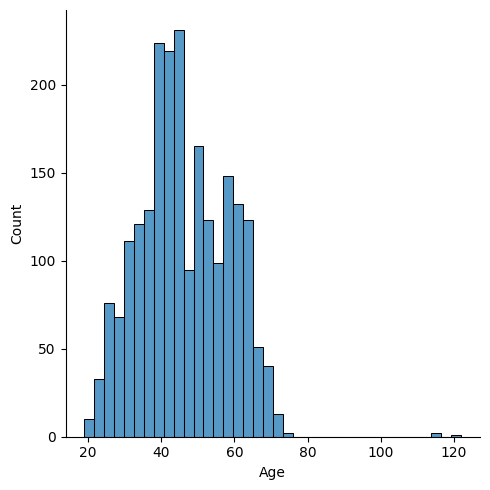

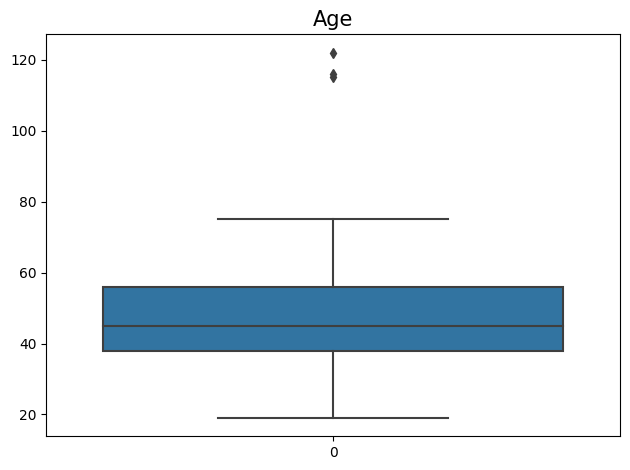

In [95]:
sns.displot(df['Age'])
plt.show()

sns.boxplot(df['Age'])
plt.title('Age', size = 15)
plt.show()

In [96]:
df['Age'].describe()

count    2216.000000
mean     46.179603  
std      11.985554  
min      19.000000  
25%      38.000000  
50%      45.000000  
75%      56.000000  
max      122.000000 
Name: Age, dtype: float64

In [97]:
Qu1 = df['Age'].quantile(0.25)
Qu3 = df['Age'].quantile(0.75)
IQuR = Qu3 - Qu1
df[df['Age'] > (Qu3 + 1.5 * IQuR)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Total_Children,Age,Age_Group,Income_Group
192,7829,1900,Postgraduate,Single,36640.0,1,0,26-09-2013,99,1,...,2,1,2,5,3,11,1,115,Elder,Middle Income
239,11004,1893,Postgraduate,Single,60182.0,0,1,17-05-2014,23,0,...,1,0,2,4,3,11,1,122,Elder,Middle Income
339,1150,1899,Postgraduate,Married,83532.0,0,0,26-09-2013,36,0,...,4,6,4,1,3,11,0,116,Elder,Upper Income


Tabel di atas menunjukan adanya outlier pada kolom Age. Terdapat pelanggan yang berumur di atas 100 tahun. Peluangnya kecil sekali manusia dapat hidup sampai berumur 100 tahun. Namun, kita juga tidak dapat memastikan apakah pelanggan tersebut masih hidup atau tidak. Cara yang lebih aman adalah kita menyaring (filter) agar outlier tidak masuk ke dalam dataframe yang akan digunakan untuk analisa data.

In [98]:
df1 = df[df['Age'] < (Qu3 + 1.5 * IQuR)]

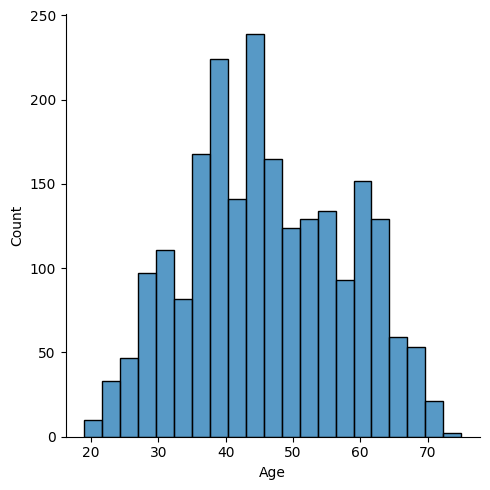

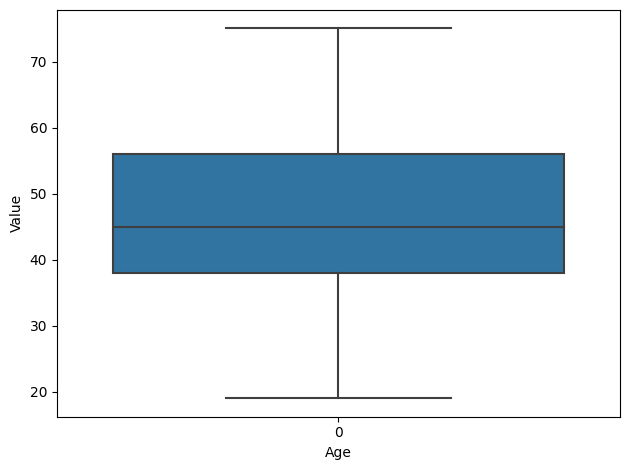

In [99]:
sns.displot(df1['Age'])
plt.show()

sns.boxplot(df1['Age'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [100]:
stats, pval= normaltest(df1['Age'])
if pval <= 0.05:
    print('Distribusi Tidak Normal') #Ha
elif pval >= 0.05: 
    print('Distribusi Normal') #Ho 
print(pval)

Distribusi Tidak Normal
8.877899360290688e-41


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   int64  
 1   Year_Birth           2213 non-null   int64  
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   int64  
 6   Teenhome             2213 non-null   int64  
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   Complain             2213 non-null   int64  
 10  MntWines             2213 non-null   int64  
 11  MntFruits            2213 non-null   int64  
 12  MntMeatProducts      2213 non-null   int64  
 13  MntFishProducts      2213 non-null   int64  
 14  MntSweetProducts     2213 non-null   int64  
 15  MntGoldProds         2213 non-null   i

### Outliers pada Income

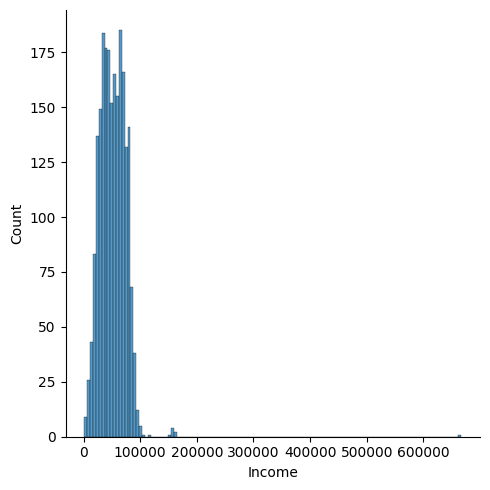

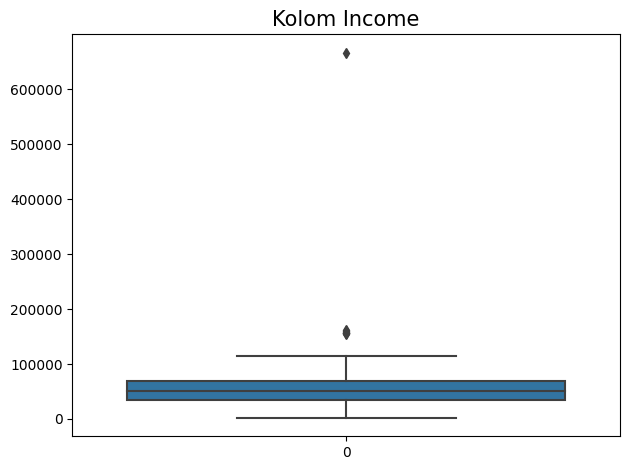

In [102]:
sns.displot(df1['Income'])
plt.show()

sns.boxplot(df1['Income'])
plt.title('Kolom Income', size = 15)
plt.show()

In [103]:
df1['Income'].describe()

count    2213.000000  
mean     52236.581563 
std      25178.603047 
min      1730.000000  
25%      35246.000000 
50%      51373.000000 
75%      68487.000000 
max      666666.000000
Name: Income, dtype: float64

In [104]:
Q1 = df1['Income'].quantile(0.25)
Q3 = df1['Income'].quantile(0.75)
IQR = Q3 - Q1

df1[df1['Income'] > (Q3 + 1.5 * IQR)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Total_Children,Age,Age_Group,Income_Group
164,8475,1973,Postgraduate,Married,157243.0,0,1,01-03-2014,98,0,...,0,22,0,0,3,11,1,42,Senior Adult,Upper Income
617,1503,1976,Postgraduate,Married,162397.0,1,1,03-06-2013,31,0,...,0,0,1,1,3,11,2,39,Adult,Upper Income
655,5555,1975,Graduate,Single,153924.0,0,0,07-02-2014,81,0,...,0,0,0,0,3,11,0,40,Senior Adult,Upper Income
687,1501,1982,Postgraduate,Married,160803.0,0,0,04-08-2012,21,0,...,0,28,1,0,3,11,0,33,Adult,Upper Income
1300,5336,1971,Postgraduate,Married,157733.0,1,0,04-06-2013,37,0,...,1,0,1,1,3,11,1,44,Senior Adult,Upper Income
1653,4931,1977,Graduate,Married,157146.0,0,0,29-04-2013,13,0,...,0,28,0,1,3,11,0,38,Adult,Upper Income
2132,11181,1949,Postgraduate,Married,156924.0,0,0,29-08-2013,85,0,...,0,0,0,0,3,11,0,66,Elder,Upper Income
2233,9432,1977,Graduate,Married,666666.0,1,0,02-06-2013,23,0,...,3,1,3,6,3,11,1,38,Adult,Upper Income


Tabel di atas menunjukan outlier pada kolom Income. Terdapat pelanggan yang penghasilannya mencapai $600.000. Pelanggan lain juga memiliki penghasilan fantastis, jauh di atas penghasilan pelanggan lainnya. Penghasilan yang dianggap data outlier adalah penghasilan yang di atas $118.000 (berdasarkan perhitungan Q3 + 1.5 * IQR). Sebaiknya kita menyaring (filter) agar outlier tidak masuk ke dalam dataframe yang akan digunakan untuk analisa data.

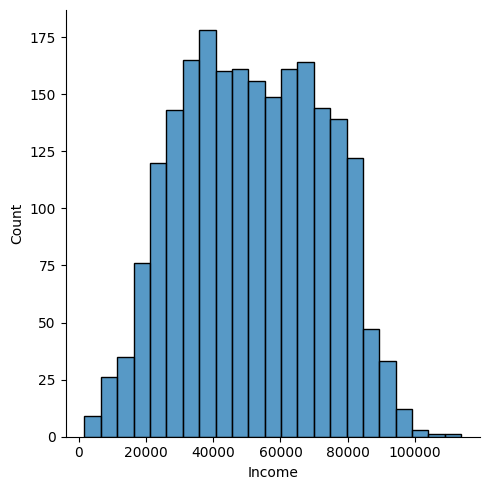

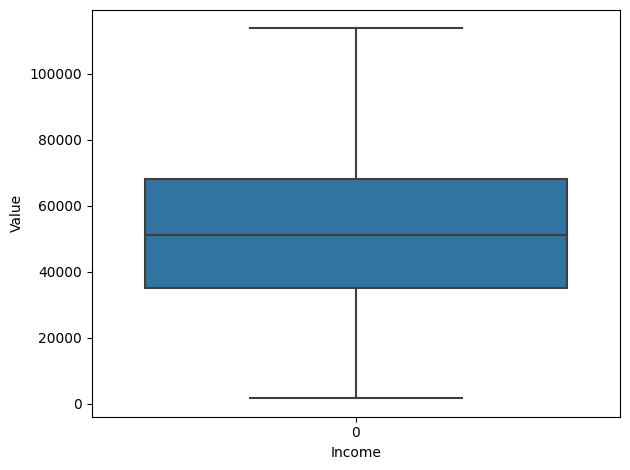

In [105]:
df2 = df1[df1['Income'] < (Q3 + 1.5 * IQR)]

sns.displot(df2['Income'])
plt.show()

sns.boxplot(df2['Income'])
plt.xlabel('Income')
plt.ylabel('Value')
plt.show()

In [106]:
stats, pval= normaltest(df2['Income'])
if pval <= 0.05:
    print('Distribusi Tidak Normal') #Ha
elif pval >= 0.05: 
    print('Distribusi Normal') #Ho 
print(pval)

Distribusi Tidak Normal
7.665491424295057e-51


Data outlier pada kolom Age dan Income telah kita saring (filter) dengan membuat dataframe baru. Setelah disaring, kita ingin mengetahui distribusi data pada kedua kolom tersebut. Pertama kita menguji dengan menggunakan visualisasi Displot dan Boxplot. Dapat dilihat data memang tidak terdistribusi normal. Kita perlu mengecek kembali menggunakan tes hipotesis (Hypothesis Testing), yaitu dengan tes normalitas. Hasil tes menunujukkan bahwa kedua kolom tidak terdistribusi normal.

In [107]:
df2.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'Recency', 'Complain'],inplace=True)

C:\Users\Khaesyar\AppData\Local\Temp\ipykernel_12108\938963647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'Recency', 'Complain'],inplace=True)


Kolom ID, Z_Revenue, dan Z_CostContact sama sekali tidak memiliki relevansi dengan analisa data. Kolom Dt_Customer, Recency, dan Complain juga kurang memiliki relevansi sehingga sulit menggunakan data ketiga kolom untuk analisa data. Kita sepakat untuk menghapus keenam kolom tersebut.

In [108]:
print(f'Jumlah baris dan kolom di dataset df2 adalah {df2.shape}')
df2.info()

Jumlah baris dan kolom di dataset df2 adalah (2205, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2205 non-null   int64  
 1   Education            2205 non-null   object 
 2   Marital_Status       2205 non-null   object 
 3   Income               2205 non-null   float64
 4   Kidhome              2205 non-null   int64  
 5   Teenhome             2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  AcceptedCmp1         2205 non-null   int64  
 14  AcceptedCmp2         2205 non-nu

# Data Analysis

## Analisa Karakteristik Pelanggan

In [109]:
df2['Income_Group'].value_counts()

Middle Income    1157
Low Income       549 
Upper Income     499 
Name: Income_Group, dtype: int64

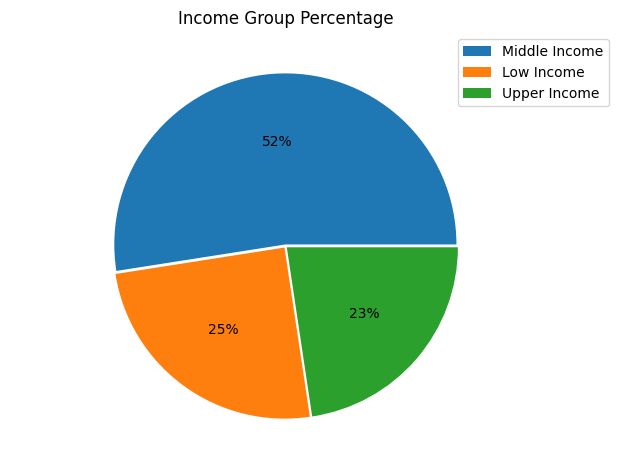

In [110]:
plt.gca().axis('equal')
df2['Income_Group'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01, 0.01))
plt.title('Income Group Percentage')
plt.legend(['Middle Income', 'Low Income', 'Upper Income'], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Data di atas menunjukkan proporsi dan persentase dari Income Group. Pelanggan Middle Income berjumlah 1157, Low Income berjumlah 549, dan Upper Income berjumlah 499. Berdasarkan presentase, 52% persen diisi oleh pelanggan Middle Income, 25% oleh pelanggan Low Income, dan 23% oleh pelanggan Upper Income.

In [111]:
df2['Age_Group'].value_counts()

Senior Adult    1160
Adult           670 
Elder           360 
Junior Adult    15  
Name: Age_Group, dtype: int64

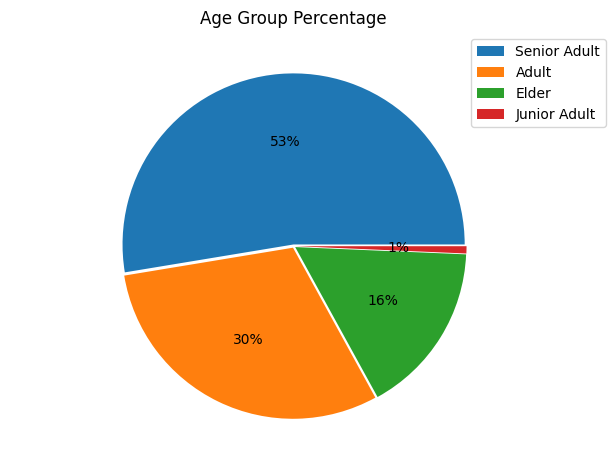

In [112]:
plt.gca().axis('equal')
df2['Age_Group'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01, 0.01, 0.01))
plt.title('Age Group Percentage')
plt.legend(['Senior Adult', 'Adult', 'Elder', 'Junior Adult'], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Data di atas menunjukkan proporsi dan persentase dari Age Group. Pelanggan Senior Adult berjumlah 1160, Adult berjumlah 670, Elder berjumlah 360, dan Junior Adult berjumlah 15. Presentase yang dihasilkan, 53% diisi oleh pelanggan Senior Adult, 30% oleh pelanggan Adult, 16% oleh pelanggan Elder, dan 1% oleh Junior Adult. Tampak timpang sekali antara pelanggan Junior Adult dengan kategori pelanggan lainnya.

In [113]:
df2['Education'].value_counts()

Graduate         1113
Postgraduate     1038
Undergraduate    54  
Name: Education, dtype: int64

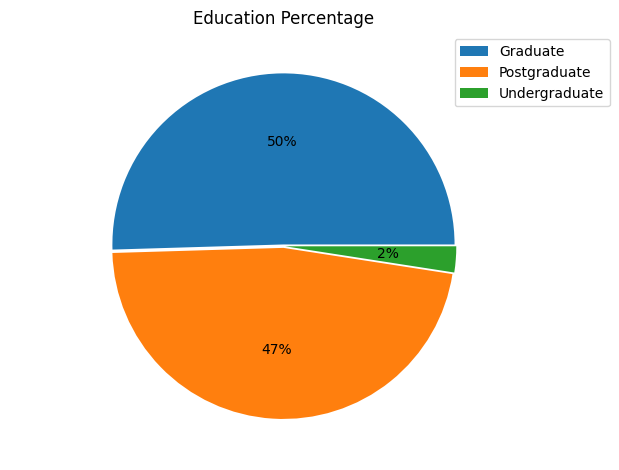

In [114]:
plt.gca().axis('equal')
df2['Education'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01, 0.01))
plt.title('Education Percentage')
plt.legend(['Graduate', 'Postgraduate', 'Undergraduate'], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Dapat dilihat proporsi dan persentase berdasarkan Education. Pelanggan kategori Graduate berjumlah 1113, Postgraduate berjumlah 1038, dan Undergraduate berjumlah 54. Presentase menunjukkan 50% diisi oleh pelanggan kategori Graduate, 47% oleh pelanggan kategori Postgraduate, dan 2% oleh pelanggan kategori Undergraduate. Ketimpangan juga terlihat di antara pelanggan kategori Undergraduate dengan kategori pelanggan lainnya.

In [115]:
df2['Marital_Status'].value_counts()

Married    1422
Single     783 
Name: Marital_Status, dtype: int64

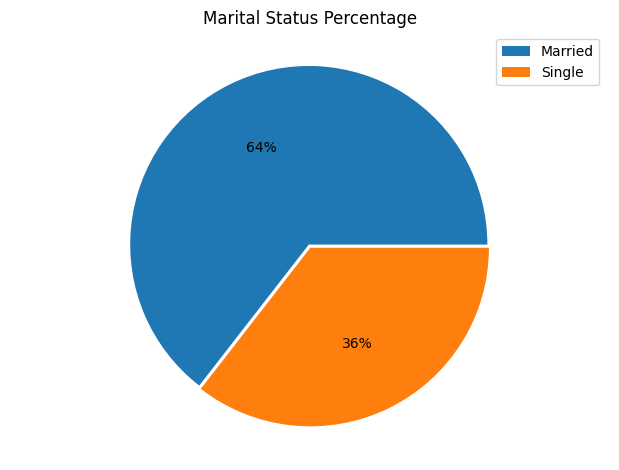

In [116]:
plt.gca().axis('equal')
df2['Marital_Status'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01))
plt.title('Marital Status Percentage')
plt.legend(['Married', 'Single'], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Tampilan di atas menunjukkan proporsi dan persentase berdasarkan Marital Status. Pelanggan kategori Married berjumlah 1422 dan Single berjumlah 783. Presentase menunjukkan 64% diisi oleh pelanggan kategori Married dan 36% oleh pelanggan kategori Single.

In [117]:
df2['Total_Children'].value_counts()

1    1112
0    628 
2    415 
3    50  
Name: Total_Children, dtype: int64

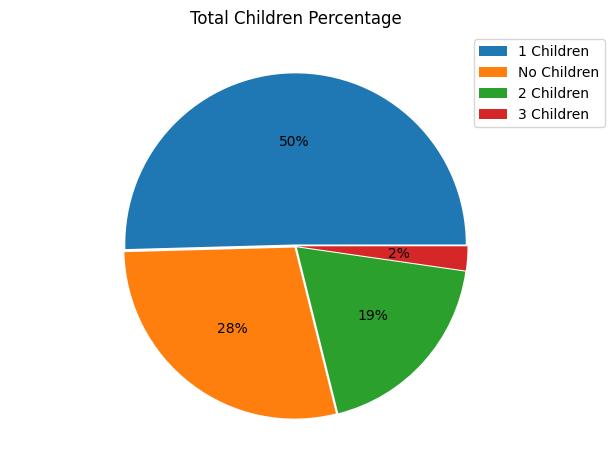

In [118]:
plt.gca().axis('equal')
df2['Total_Children'].value_counts().plot(kind= 'pie', autopct= '%1.0f%%', labels= None, explode= (0.01, 0.01, 0.01, 0.01))
plt.title('Total Children Percentage')
plt.legend(['1 Children', 'No Children', '2 Children', '3 Children'], bbox_to_anchor=(0.8,1))
plt.ylabel(None)
plt.show()

Dapat dilihat proporsi dan persentase berdasarkan Total Children. Pelanggan dengan Total Children 1 berjumlah 1112, Total Children 0 berjumlah 628, Total Children 2 berjumlah 415, dan Total Children 3 berjumlah 50. Presentase menunjukkan 50% diisi oleh pelanggan dengan Total Children 1, 28% oleh pelanggan dengan Total Children 0, 19% oleh pelanggan dengan Total Children 2, dan 2% oleh pelanggan dengan Total Children 3. Ketimpangan terlihat di antara pelanggan dengan Total Children 3 dengan kategori pelanggan lainnya.

## Age Group, Education, Marital Status, dan Total Children Berdasarkan Income

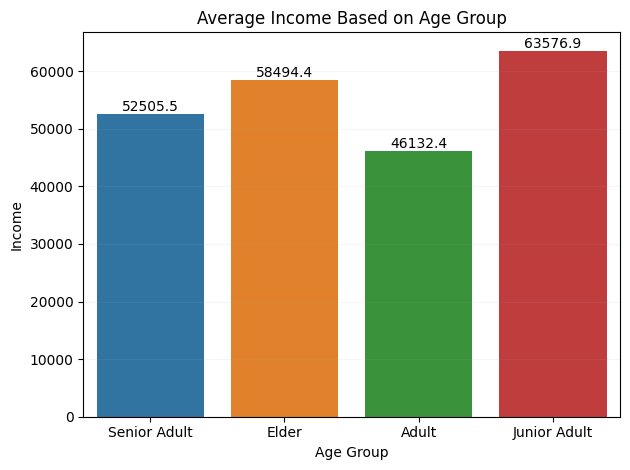

In [119]:
splot = sns.barplot(data = df2, x = 'Age_Group', y = 'Income', estimator= np.mean, errorbar= None)
plt.title('Average Income Based on Age Group')
plt.ticklabel_format(axis='y', style= 'plain')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.bar_label(splot.containers[0],)
plt.grid(axis= 'y', alpha= 0.1)
plt.show()


Diagram batang di atas menunjukkan Average Income berdasarkan Age Group. Cukup mengejutkan karena Pelanggan Junior Adult memiliki Average Income tertinggi. Namun, jika ditelisik lebih jauh, jumlah pelanggan Junior Adult sangat sedikit. Pelanggan Elder menjadi kedua tertinggi. Pelanggan Senior Adult yang idealnya berada di urutan pertama karena berada pada umur produktif, hanya menempati urutan ketiga. Hal ini menjadi sebuah keunikan tersendiri.

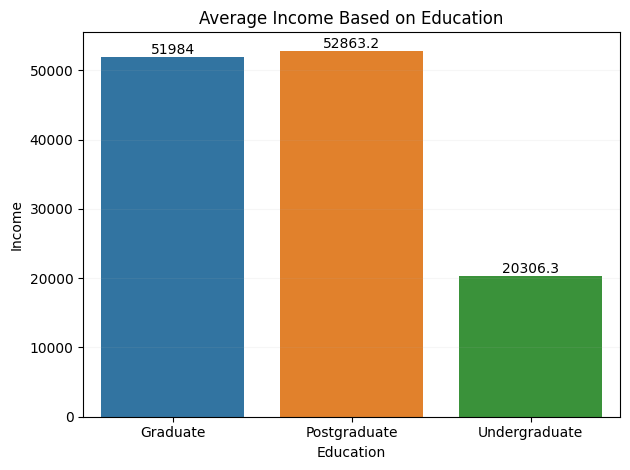

In [120]:
splot = sns.barplot(data = df2, x = 'Education', y = 'Income', estimator= np.mean, errorbar= None)
plt.title('Average Income Based on Education')
plt.ticklabel_format(axis='y', style= 'plain')
plt.xlabel('Education')
plt.ylabel('Income')
plt.bar_label(splot.containers[0],)
plt.grid(axis= 'y', alpha= 0.1)
plt.show()

Pelanggan kategori Postgraduate memiliki average income tertinggi dibanding dua kategori lainnya. Tetapi, perbedaannya dengan pelanggan kategori Graduate cukup tipis. Pelanggan kategori Undergraduate berada jauh di bawah kedua kategori lainnya.

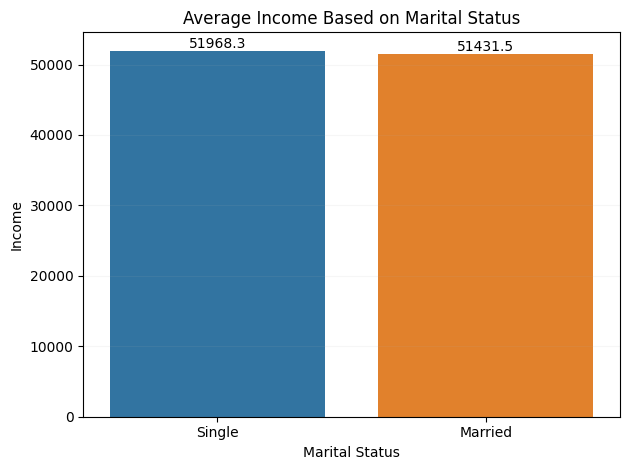

In [121]:
splot = sns.barplot(data = df2, x = 'Marital_Status', y = 'Income', estimator= np.mean, errorbar= None)
plt.title('Average Income Based on Marital Status')
plt.ticklabel_format(axis='y', style= 'plain')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.bar_label(splot.containers[0],)
plt.grid(axis= 'y', alpha= 0.1)
plt.show()

Tampak perbedaan yang sangat tipis antara pelanggan kategori Single dan Married. Pelanggan kategori Single unggul sedikit di atas pelanggan kategori Married.

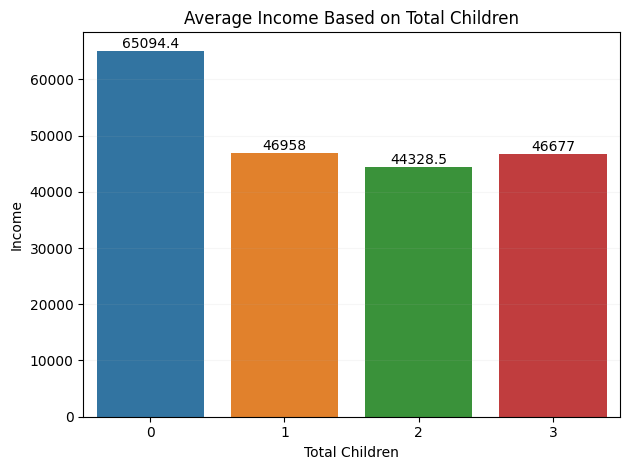

In [122]:
splot = sns.barplot(data = df2, x = 'Total_Children', y = 'Income', estimator= np.mean, errorbar= None)
plt.title('Average Income Based on Total Children')
plt.ticklabel_format(axis='y', style= 'plain')
plt.xlabel('Total Children')
plt.ylabel('Income')
plt.bar_label(splot.containers[0],)
plt.grid(axis= 'y', alpha= 0.1)
plt.show()

Diagram batang menunjukkan Average Income berdasarkan Total Children. Pelanggan dengan Total Children 0 menempati urutan pertama. Ketiga kategori lainnya memiliki perbedaan yang tidak signifikan.

## Hubungan Karakteristik Customer dengan Produk, Kebiasaan Berbelanja, dan Promosi yang Ditawarkan

### Berdasarkan Grup Umur

In [123]:
df_Age_Spending = df2[['Age_Group', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']].groupby('Age_Group').sum()
df_Age_Spending

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Age_Group,,,,,,
Adult,24001,17531,27615,106839,17513,160561
Elder,15738,9522,18645,69929,10859,144019
Junior Adult,1406,649,1042,5127,691,5357
Senior Adult,42108,30517,49844,182618,30755,365156


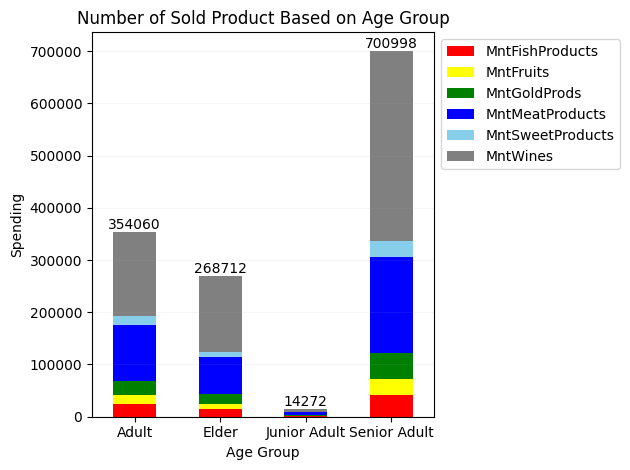

In [124]:
splot = df_Age_Spending.plot(kind= 'bar', stacked= True, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'])
plt.title('Number of Sold Product Based on Age Group')
plt.bar_label(splot.containers[5])
plt.xticks(rotation= 0)
plt.xlabel('Age Group')
plt.ylabel('Spending')
plt.grid(axis= 'y', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Sold Product Based on Age Group.png')
plt.show()

Pelanggan Senior Adult merupakan kategori yang membeli produk perusahaan terbanyak, diikuti oleh pelanggan Adult di urutan kedua. Wine Product merupakan penjualan terlaris pada pelanggan kategori Senior Adult, Adult, dan Elder. Produk terlaris kedua adalah Meat Product. Sweets dan Fruits Products kurang diminati oleh seluruh kategori pelanggan. Pelanggan Junior Adult merupakan kategori yang paling sedikit membeli produk perusahaan. Proporsi masing-masing produk tidak terlihat perbedaan signifikan pada pelanggan kategori Junior Adult.

In [125]:
df_Age_Purchase = df2[['Age_Group', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].groupby('Age_Group').sum()
df_Age_Purchase

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Age_Group,,,,,
Adult,1486,1351,3579,2396,3756
Elder,1230,816,2359,1698,1707
Junior Adult,73,17,98,55,53
Senior Adult,3044,2928,6805,4893,6252


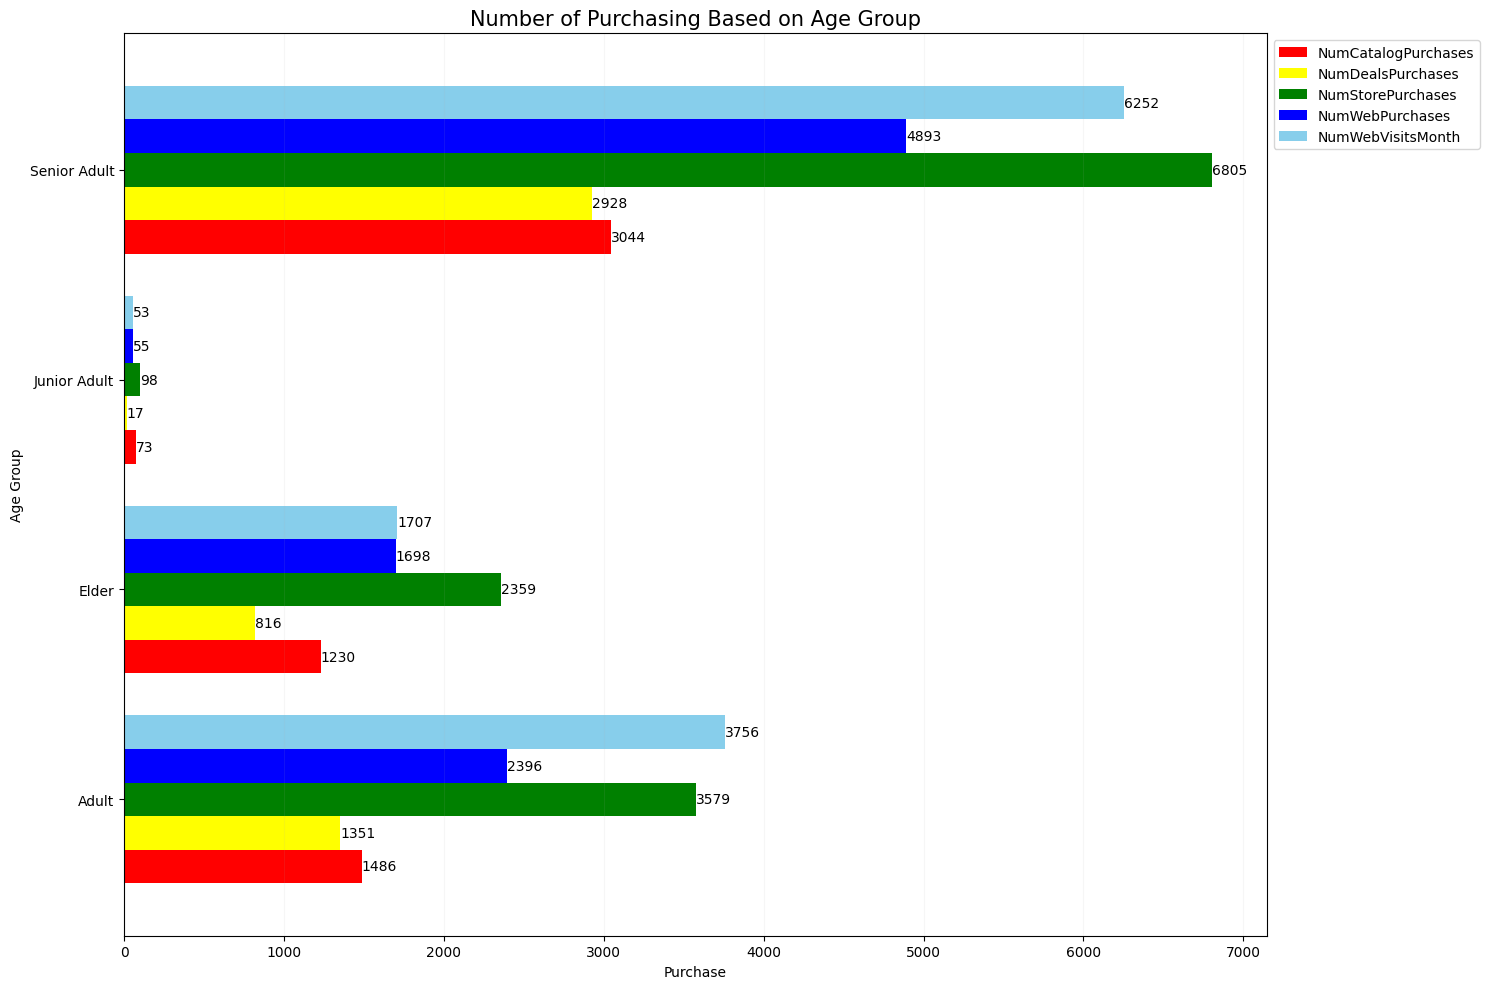

In [126]:

splot = df_Age_Purchase.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Number of Purchasing Based on Age Group', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.xlabel('Purchase')
plt.ylabel('Age Group')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Purchasing Based on Age Group.png')
plt.show()

Pelanggan kategori Senior Adult menempati urutan pertama pada masing-masing cara berbelanja. Store Purchase masih paling diminati oleh berbagai kategori pelanggan. Pelanggan kategori Senior Adult dan Adult memiliki ketertarikan pada Web Visits.

In [127]:
df_Age_Campaign = df2[['Age_Group', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby('Age_Group').sum()
df_Age_Campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Age_Group,,,,,,
Adult,46,5,64,32,53,104
Elder,32,4,24,36,34,57
Junior Adult,2,1,2,1,4,5
Senior Adult,62,20,73,95,70,167


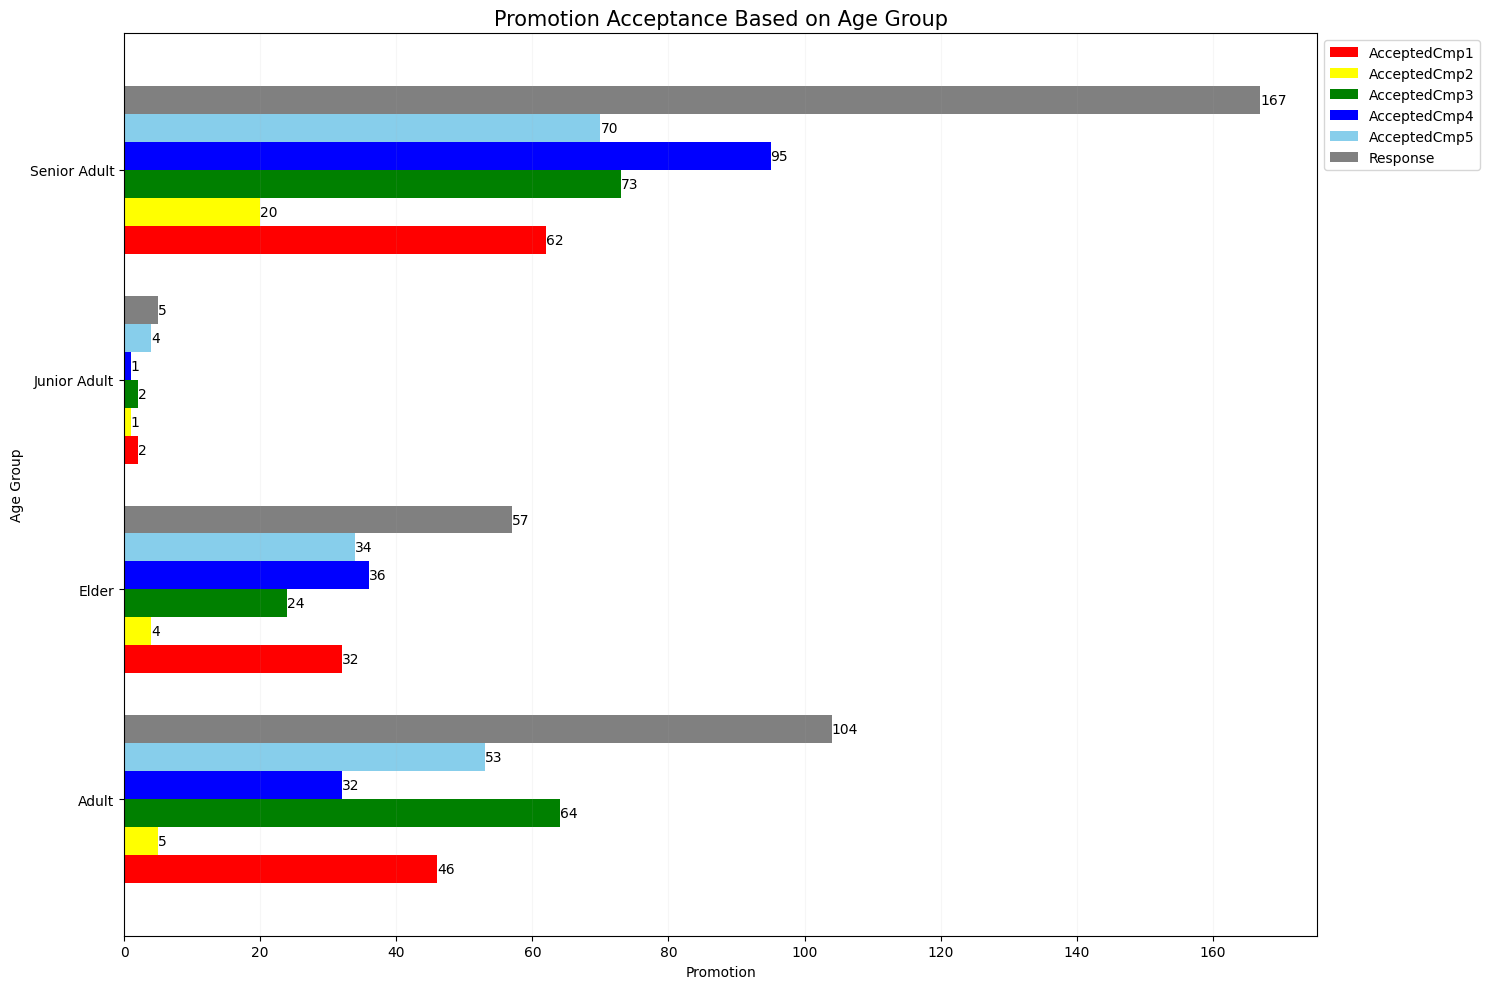

In [128]:
splot = df_Age_Campaign.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Promotion Acceptance Based on Age Group', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.bar_label(splot.containers[5])
plt.xlabel('Promotion')
plt.ylabel('Age Group')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Promotion Acceptance Based on Age Group.png')
plt.show()

Pelanggan Senior Adult menjadi yang pertama dalam Promotion Acceptance. Pelanggan dari seluruh kategori memiliki minat yang cukup tinggi pada Response (promosi terakhir). Pelanggan dari seluruh kategori terlihat tidak antusias pada AcceptedCmp2 (promosi kedua).

### Berdasarkan Grup Penghasilan

In [129]:
df_Income_Spending = df2[['Income_Group', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']].groupby('Income_Group').sum()
df_Income_Spending

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Income_Group,,,,,,
Low Income,4709,3262,8915,12237,3198,11707
Middle Income,33252,23692,51273,132175,22721,338676
Upper Income,45292,31265,36958,220101,33899,324710


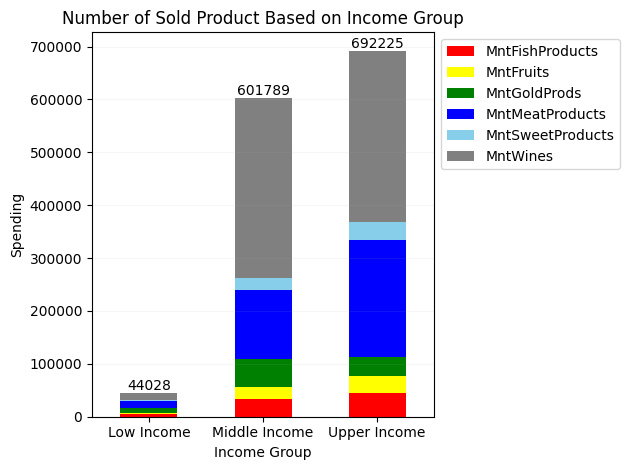

In [130]:
splot = df_Income_Spending.plot(kind= 'bar', stacked= True, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'])
plt.title('Number of Sold Product Based on Income Group')
plt.bar_label(splot.containers[5])
plt.xticks(rotation= 0)
plt.xlabel('Income Group')
plt.ylabel('Spending')
plt.grid(axis= 'y', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Sold Product Based on Income Group.png')
plt.show()

Pelanggan Upper Income menempati urutan pertama pada pembelian produk perusahaan. Sementara, pelanggan Low Income berada di urutan terakhir. Pelanggan Upper Income dan Middle Income paling banyak membeli Wine Product. Produk terlaris kedua bagi dua kategori tersebut adalah Meat Product. Sweets dan Fruit Product tampak kurang diminati oleh semua kategori pelanggan.

In [131]:
df_Income_Purchase = df2[['Income_Group', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].groupby('Income_Group').sum()
df_Income_Purchase

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Income_Group,,,,,
Low Income,259,1124,1623,1098,3842
Middle Income,2702,3312,7010,5283,6495
Upper Income,2872,676,4208,2661,1431


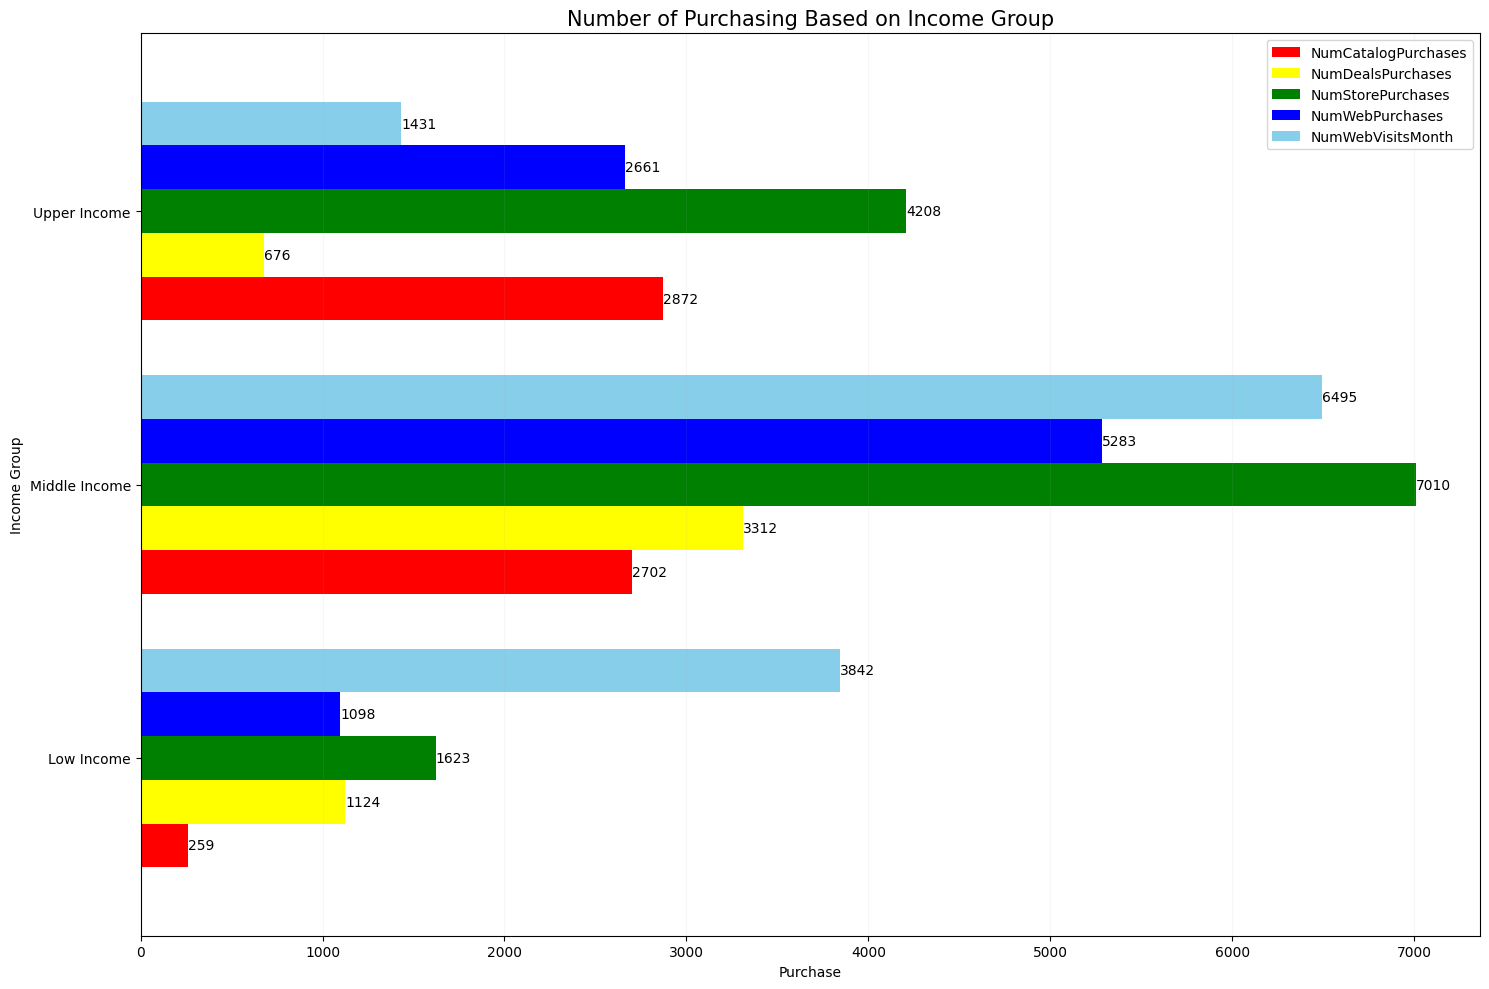

In [132]:
splot = df_Income_Purchase.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Number of Purchasing Based on Income Group', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.xlabel('Purchase')
plt.ylabel('Income Group')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Purchasing Based on Income Group.png')
plt.show()

Pelanggan Middle Income menempati urutan pertama pada empat dari lima cara berbelanja. Pelanggan Upper Income menempati urutan pertama pada Catalog Purchase. Store Purchase masih menjadi pilihan utama bagi seluruh kategori. Meskipun berada di urutan terakhir, pelanggan Lower Income memiliki minat yang cukup bagus pada Web Visits.

In [133]:
df_Income_Campaign = df2[['Income_Group', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby('Income_Group').sum()
df_Income_Campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Income_Group,,,,,,
Low Income,0,0,41,1,0,55
Middle Income,24,14,79,89,13,136
Upper Income,118,16,43,74,148,142


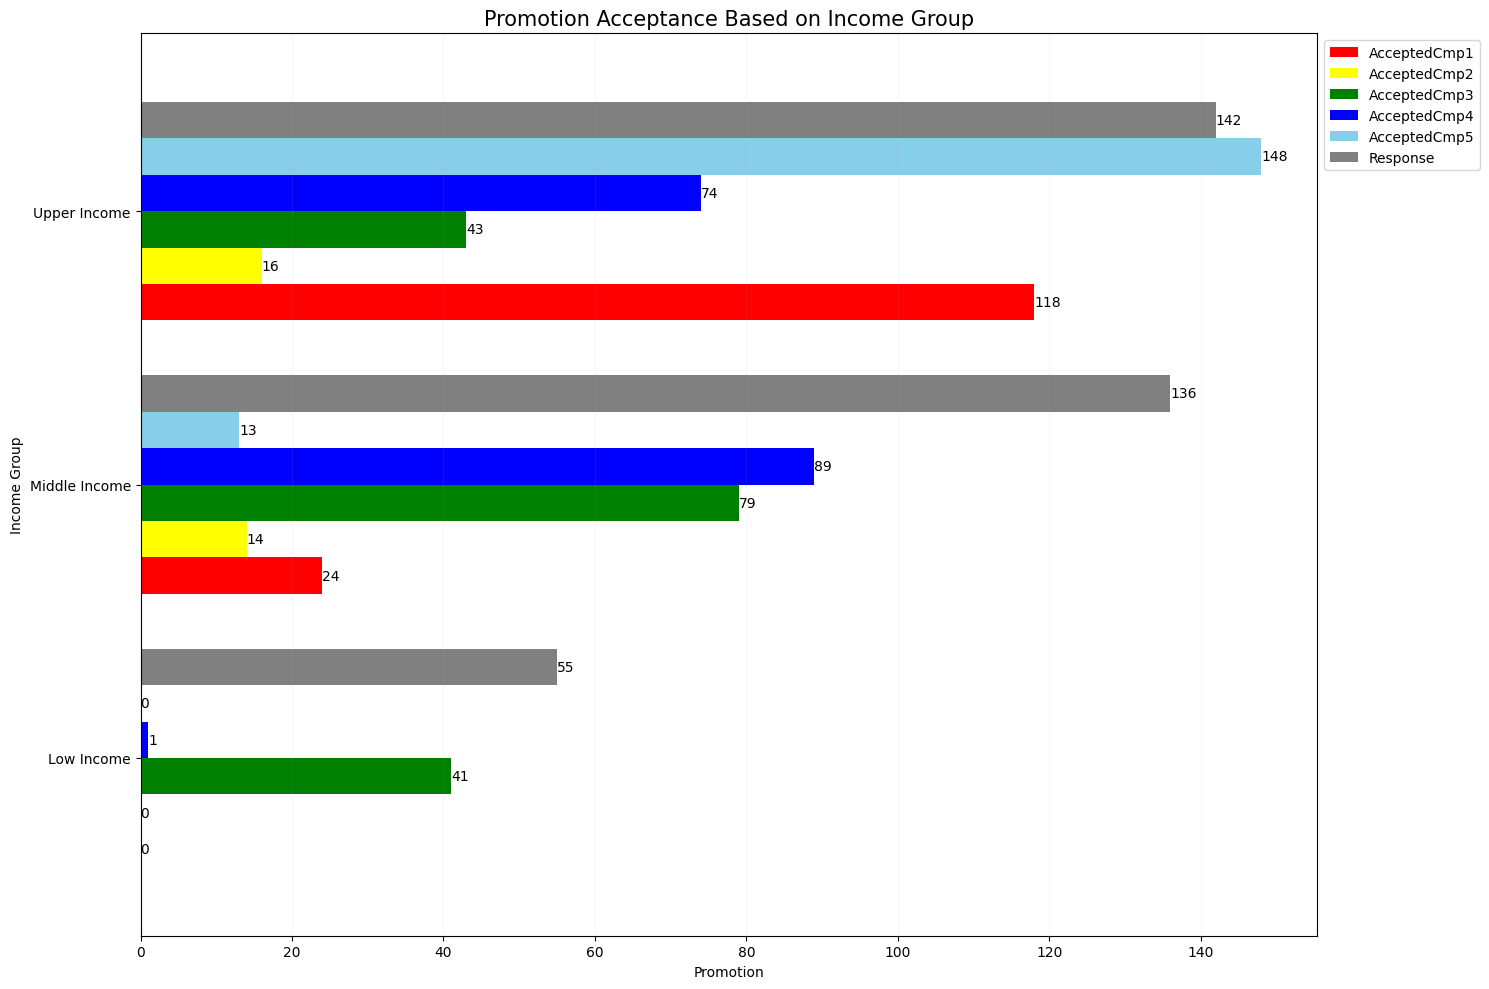

In [134]:
splot = df_Income_Campaign.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Promotion Acceptance Based on Income Group', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.bar_label(splot.containers[5])
plt.xlabel('Promotion')
plt.ylabel('Income Group')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Promotion Acceptance Based on Income Group')
plt.show()

Pelanggan Upper Income menjadi yang pertama dalam Promotion Acceptance. Pelanggan dari seluruh kategori memiliki minat yang cukup tinggi pada Response (promosi terakhir). Pelanggan dari seluruh kategori terlihat tidak antusias pada AcceptedCmp2 (promosi kedua), bahkan pelanggan Low Income tidak tertarik sama sekali.

### Berdasarkan Latar Pendidikan

In [135]:
df_Education_Spending = df2[['Education', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']].groupby('Education').sum()
df_Education_Spending

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
Graduate,48442,34426,56549,199575,34912,318100
Postgraduate,33890,23193,39364,164320,24252,356602
Undergraduate,921,600,1233,618,654,391


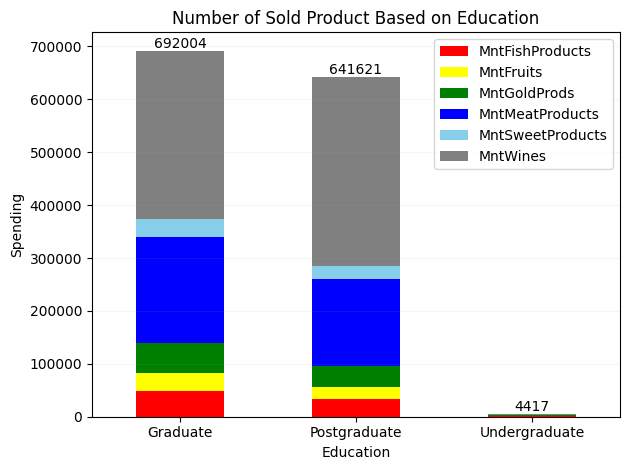

In [136]:
splot = df_Education_Spending.plot(kind= 'bar', stacked= True, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'])
plt.title('Number of Sold Product Based on Education')
plt.bar_label(splot.containers[5])
plt.xticks(rotation= 0)
plt.xlabel('Education')
plt.ylabel('Spending')
plt.grid(axis= 'y', alpha= 0.1)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Number of Sold Product Based on Education.png')
plt.show()

Pelanggan kategori Graduate menempati urutan pertama pada pembelian produk perusahaan. Sementara, pelanggan kategori Undergraduate berada di urutan terakhir. Pelanggan kategori Graduate dan Postgraduate paling banyak membeli Wine Product. Produk terlaris kedua bagi dua kategori tersebut adalah Meat Product. Terlihat seluruh kategori pelanggan kurang tertarik pada Sweets dan Fruits Product.

In [137]:
df_Education_Purchase = df2[['Education', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].groupby('Education').sum()
df_Education_Purchase

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Education,,,,,
Graduate,3027,2576,6516,4590,5891
Postgraduate,2780,2439,6171,4350,5506
Undergraduate,26,97,154,102,371


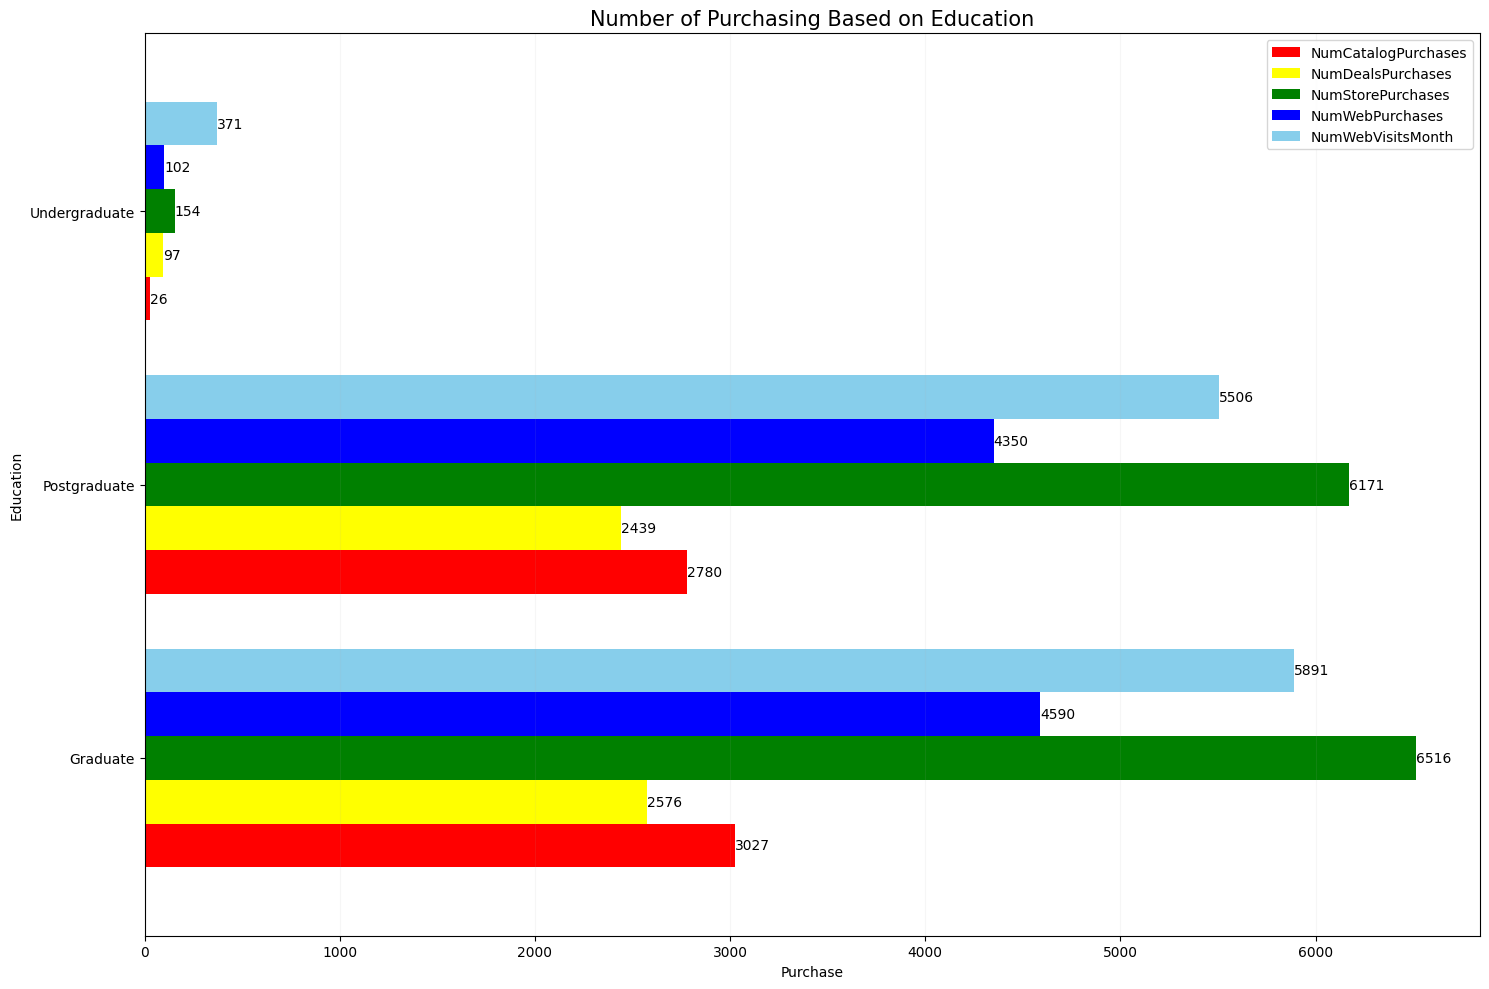

In [138]:
splot = df_Education_Purchase.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Number of Purchasing Based on Education', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.xlabel('Purchase')
plt.ylabel('Education')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Purchasing Based on Education.png')
plt.show()

Pelanggan dengan kategori Graduate menempati urutan pertama dari seluruh cara berbelanja. Namun, tidak terlihat perbedaan yang signifikan antara pelanggan kategori Graduate dan Postgraduate. Posisi terakhir diisi oleh pelanggan kategori Undergraduate. Store Purchase merupakan pilihan utama bagi seluruh kategori. Meskipun berada di urutan terakhir, pelanggan Undergraduate memiliki minat yang cukup bagus pada Web Visits. Terlihat dari angkanya yang lebih tinggi dibanding Store Purchase.

In [139]:
df_Education_Campaign = df2[['Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby('Education').sum()
df_Education_Campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Education,,,,,,
Graduate,80,16,78,79,86,152
Postgraduate,62,14,79,85,75,179
Undergraduate,0,0,6,0,0,2


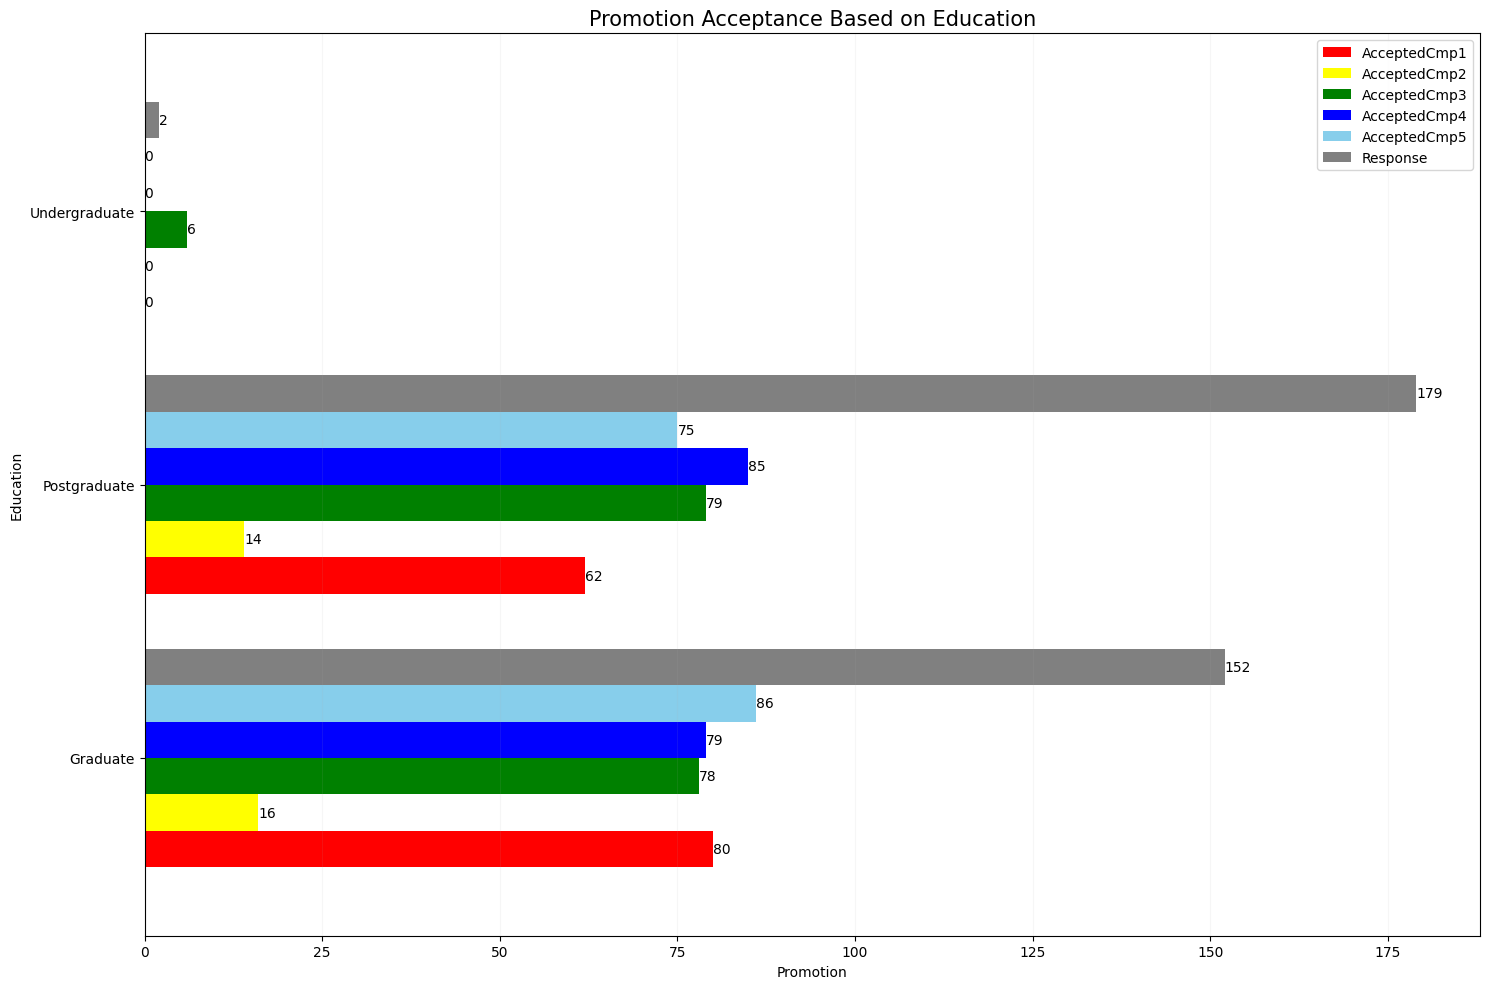

In [140]:
splot = df_Education_Campaign.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Promotion Acceptance Based on Education', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.bar_label(splot.containers[5])
plt.xlabel('Promotion')
plt.ylabel('Education')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1.,1))
plt.savefig('Promotion Acceptance Based on Education')
plt.show()

Pelanggan kategori Postgraduate menjadi yang pertama dalam Response (promosi terakhir). Pelanggan dari seluruh kategori memiliki minat yang cukup tinggi pada Response (promosi terakhir). Pelanggan dari seluruh kategori terlihat tidak antusias pada AcceptedCmp2 (promosi kedua), bahkan pelanggan kategori Undergraduate tidak tertarik sama sekali.

### Berdasarkan Status Pernikahan

In [141]:
df_Status_Spending = df2[['Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']].groupby('Marital_Status').sum()
df_Status_Spending

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Married,52641,36414,61220,227726,37884,432725
Single,30612,21805,35926,136787,21934,242368


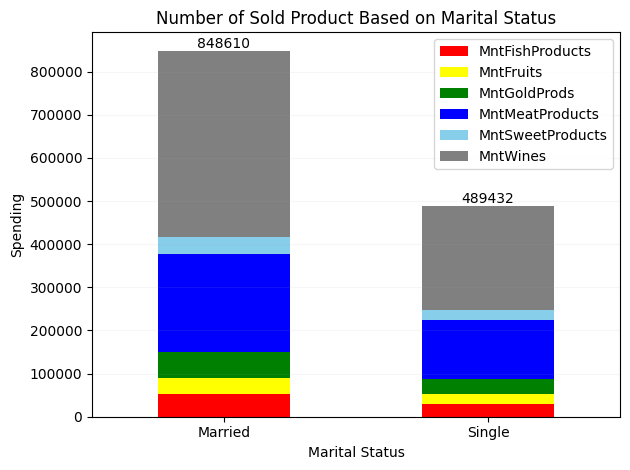

In [142]:
splot = df_Status_Spending.plot(kind= 'bar', stacked= True, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'])
plt.title('Number of Sold Product Based on Marital Status')
plt.bar_label(splot.containers[5])
plt.xticks(rotation= 0)
plt.xlabel('Marital Status')
plt.ylabel('Spending')
plt.grid(axis= 'y', alpha= 0.1)
plt.legend(bbox_to_anchor= (1, 1))
plt.savefig('Number of Sold Product Based on Marital Status.png')
plt.show()

Pelanggan kategori Married menempati urutan pertama pada pembelian produk perusahaan. Hal ini lumrah karena kebutuhan dua orang digabung menjadi satu, kita juga belum menghitung apabila pasangan memiliki anak. Pelanggan kategori Married dan Single paling banyak membeli Wine Product. Produk terlaris kedua bagi dua kategori tersebut adalah Meat Product. Animo seluruh kategori pelanggan terhadap Sweets dan Fruits Product tampak sedikit.

In [143]:
df_Status_Purchase = df2[['Marital_Status', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].groupby('Marital_Status').sum()
df_Status_Purchase

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Marital_Status,,,,,
Married,3704,3341,8301,5844,7604
Single,2129,1771,4540,3198,4164


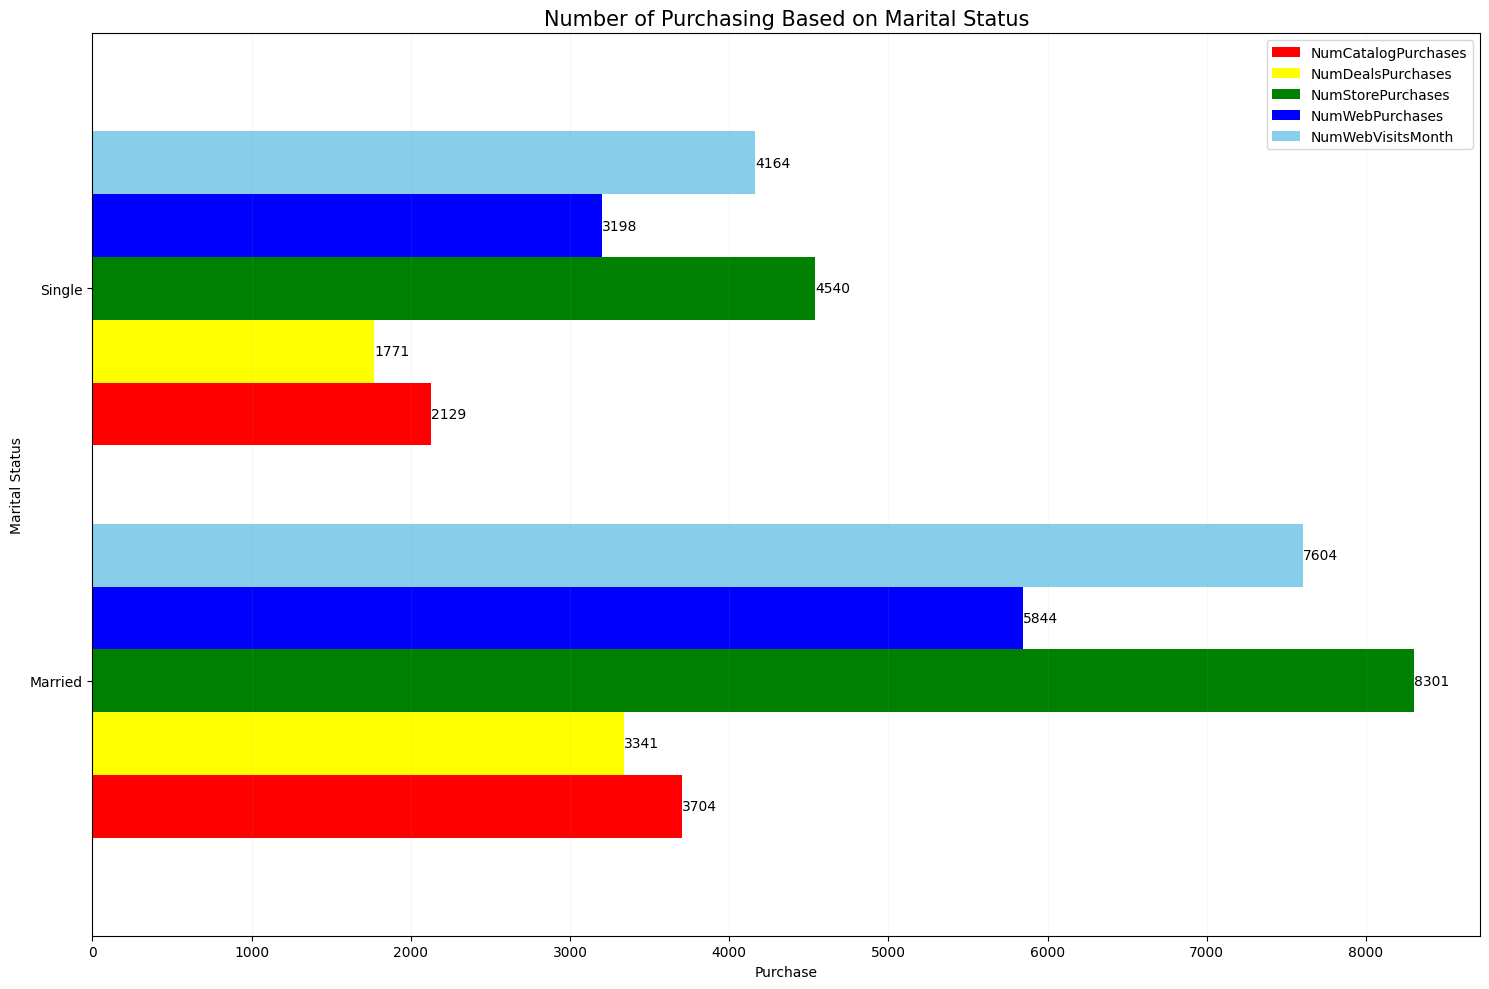

In [144]:
splot = df_Status_Purchase.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Number of Purchasing Based on Marital Status', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.xlabel('Purchase')
plt.ylabel('Marital Status')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Purchasing Based on Marital Status.png')
plt.show()

Pelanggan kategori Married menempati urutan pertama dari seluruh cara berbelanja. Store Purchase merupakan pilihan utama bagi seluruh kategori. Kedua kategori terlihat antusias pada Web Visits.

In [145]:
df_Status_Campaign = df2[['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby('Marital_Status').sum()
df_Status_Campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Marital_Status,,,,,,
Married,94,19,100,104,109,158
Single,48,11,63,60,52,175


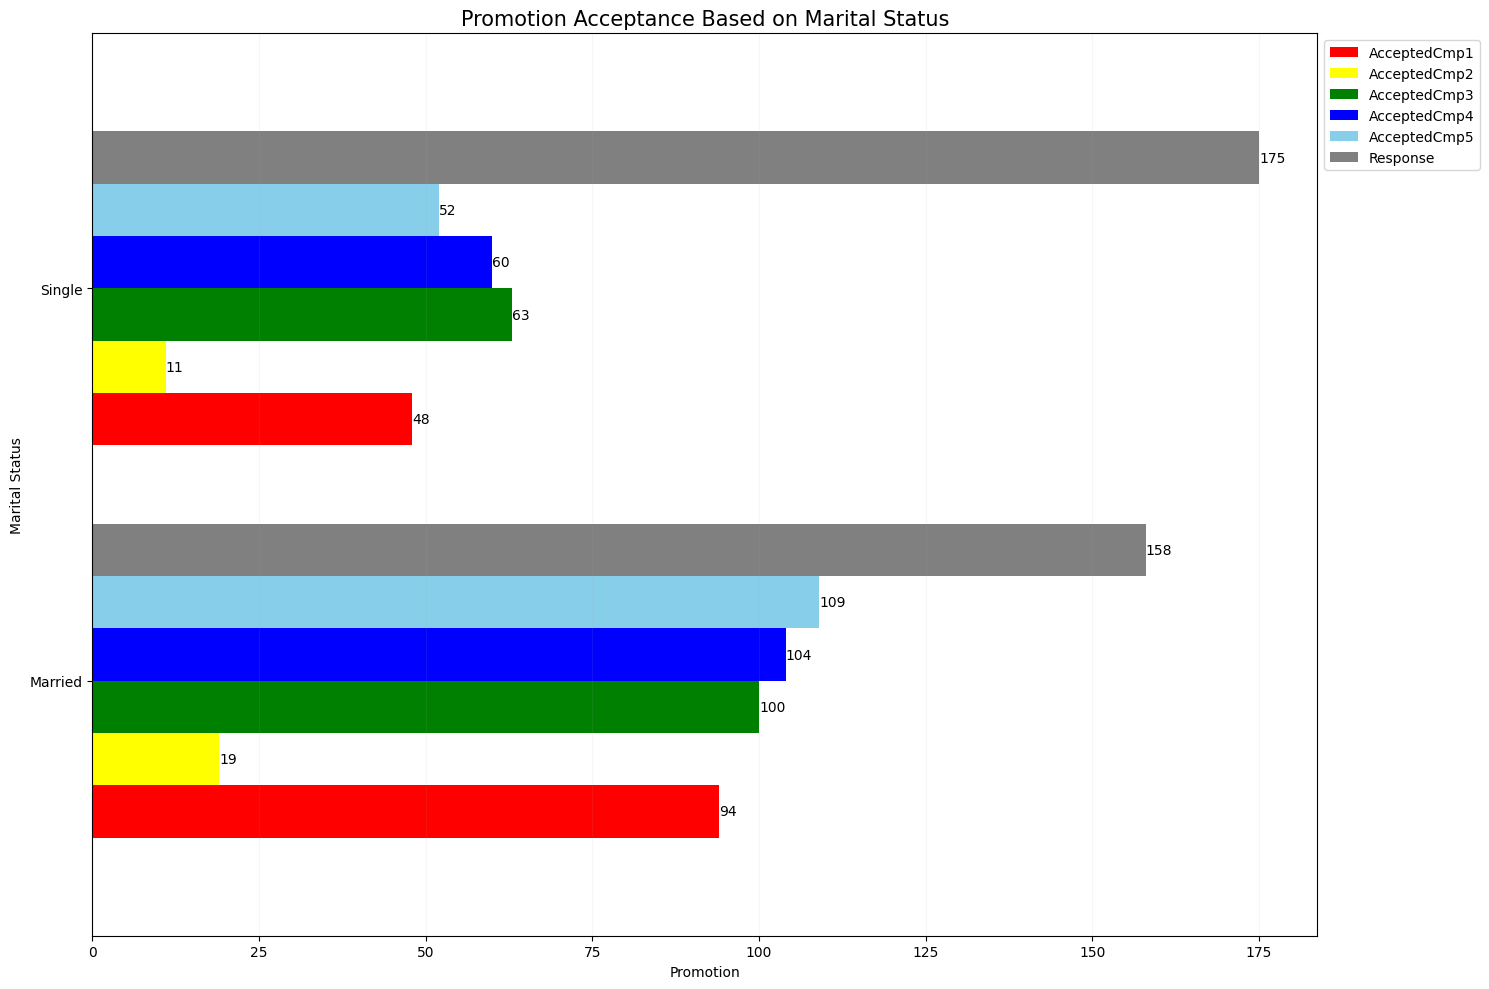

In [146]:
splot = df_Status_Campaign.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Promotion Acceptance Based on Marital Status', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.bar_label(splot.containers[5])
plt.xlabel('Promotion')
plt.ylabel('Marital Status')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Promotion Acceptance Based on Marital Status')
plt.show()

Pelanggan kategori Married menjadi yang pertama dalam Promotion Acceptance. Pelanggan dari seluruh kategori memiliki minat yang cukup tinggi pada Response (promosi terakhir). Pelanggan dari seluruh kategori terlihat kurang antusias pada AcceptedCmp2 (promosi kedua).

### Berdasarkan Total Anak

In [147]:
df_Children_Spending = df2[['Total_Children', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']].groupby('Total_Children').sum()
df_Children_Spending

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Total_Children,,,,,,
0,48375,32928,40430,230846,33593,308136
1,29918,21724,45226,109198,22516,299842
2,4692,3268,10584,21488,3455,59048
3,268,299,906,2981,254,8067


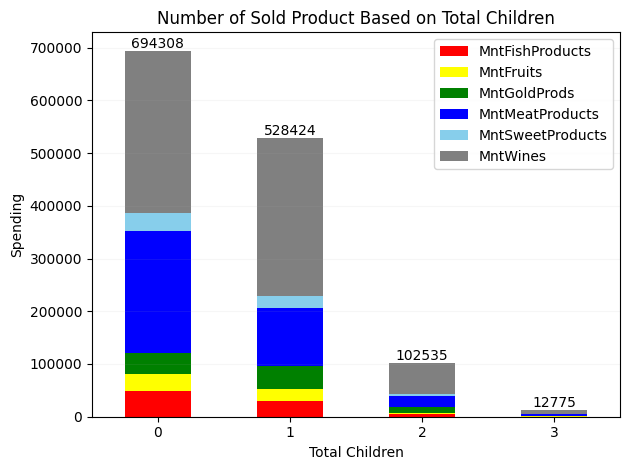

In [148]:
splot = df_Children_Spending.plot(kind= 'bar', stacked= True, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'])
plt.title('Number of Sold Product Based on Total Children')
plt.bar_label(splot.containers[5])
plt.xticks(rotation= 0)
plt.xlabel('Total Children')
plt.ylabel('Spending')
plt.grid(axis= 'y', alpha= 0.1)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Number of Sold Product Based on Total Children.png')
plt.show()

Pelanggan dengan Total Children 0 merupakan kategori yang membeli produk perusahaan terbanyak, diikuti oleh pelanggan dengan Total Children 1. Wine Product merupakan penjualan terlaris bagi seluruh kategori. Produk terlaris kedua adalah Meat Product. Produk yang kurang laris adalah Sweets dan Fruits Product. Pelanggan dengan Total Children 3 merupakan kategori yang paling sedikit membeli produk perusahaan.

In [149]:
df_Children_Purchase = df2[['Total_Children', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']].groupby('Total_Children').sum()
df_Children_Purchase

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Total_Children,,,,,
0,2957,707,4594,2785,2209
1,2373,2742,6259,4764,6617
2,453,1483,1800,1352,2622
3,50,180,188,141,320


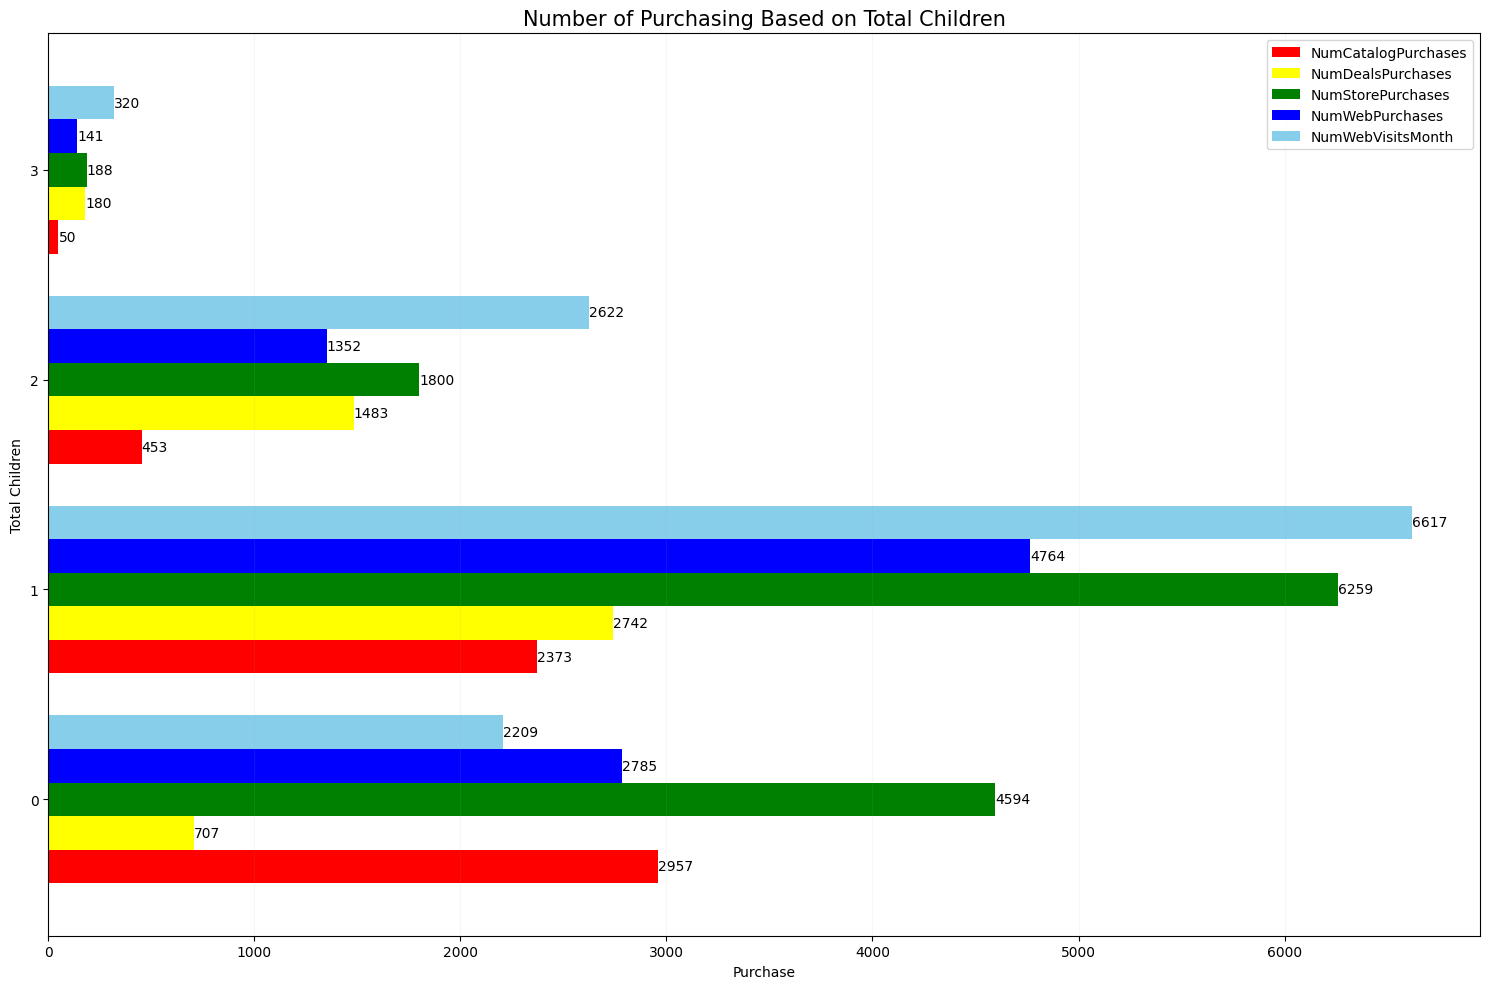

In [150]:
splot = df_Children_Purchase.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Number of Purchasing Based on Total Children', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.xlabel('Purchase')
plt.ylabel('Total Children')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Number of Purchasing Based on Total Children.png')
plt.show()

 Pelanggan kategori Total Children 1 menempati urutan pertama pada 4 dari 5 cara berbelanja. Pelanggan kategori Total Children 0 menempati urutan pertama pada Catalog Purchase. Store Purchase merupakan pilihan utama bagi seluruh kategori. Setiap kategori memiliki ketertarikan pada Web Visits.

In [151]:
df_Children_Campaign = df2[['Total_Children', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby('Total_Children').sum()
df_Children_Campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Total_Children,,,,,,
0,109,18,48,67,136,168
1,27,9,85,79,21,116
2,4,3,29,16,3,47
3,2,0,1,2,1,2


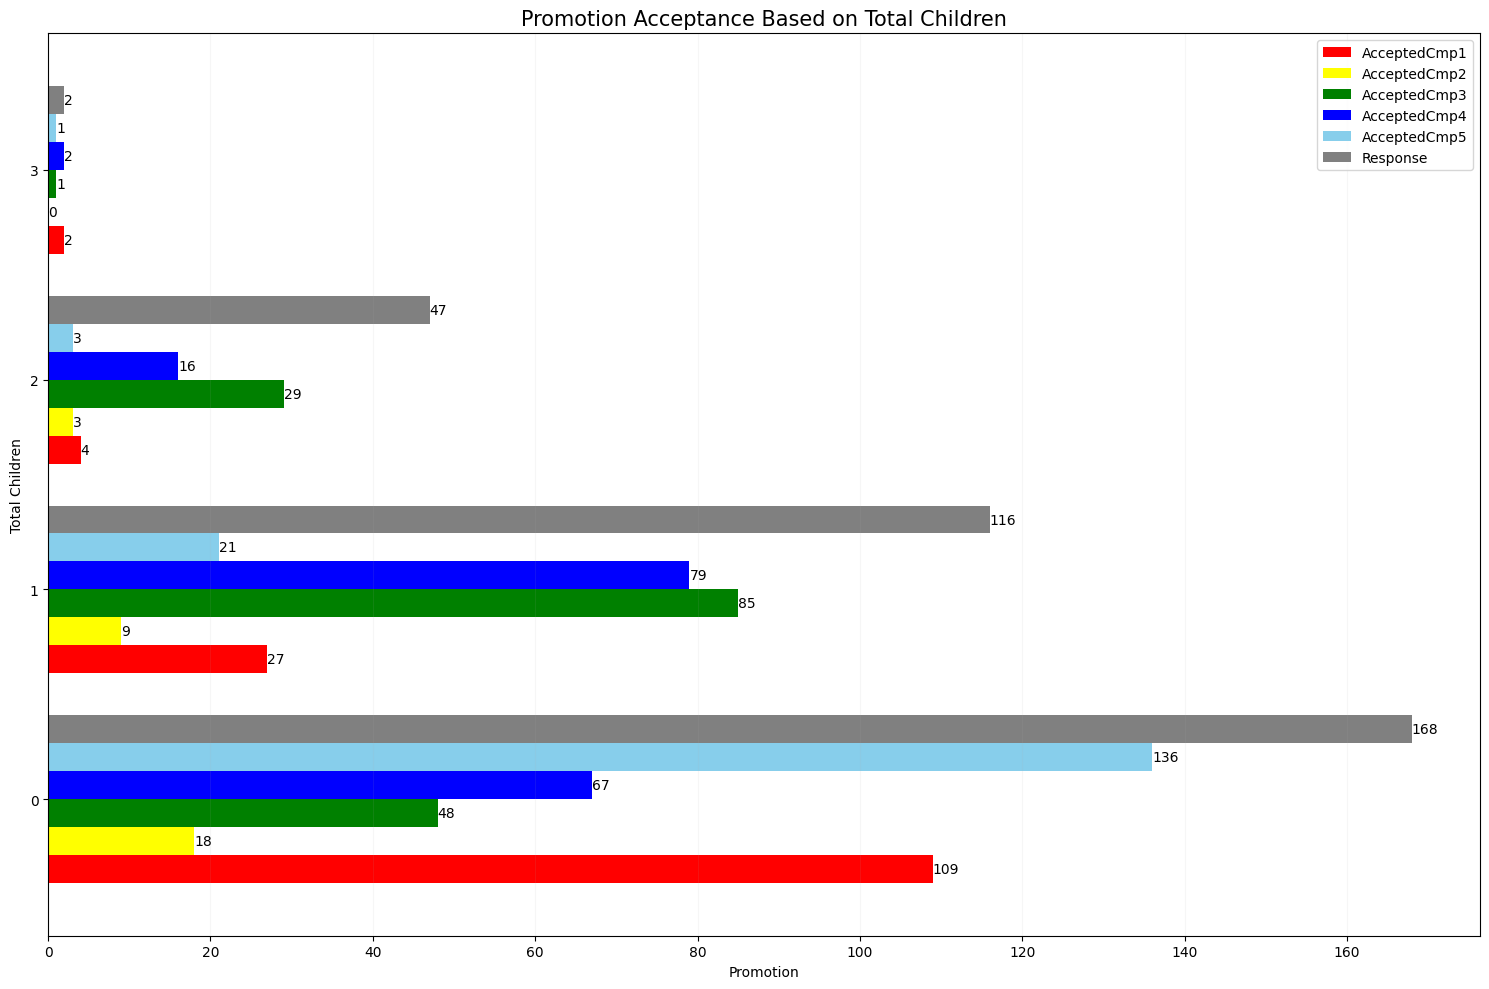

In [152]:
splot = df_Children_Campaign.plot(kind= 'barh', stacked= False, color= ['red', 'yellow', 'green', 'blue', 'skyblue', 'gray'], width= 0.8, figsize= (15,10))
plt.title('Promotion Acceptance Based on Total Children', fontsize= 15)
plt.bar_label(splot.containers[0])
plt.bar_label(splot.containers[1])
plt.bar_label(splot.containers[2])
plt.bar_label(splot.containers[3])
plt.bar_label(splot.containers[4])
plt.bar_label(splot.containers[5])
plt.xlabel('Promotion')
plt.ylabel('Total Children')
plt.grid(axis= 'x', alpha= 0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('Promotion Acceptance Based on Total Children')
plt.show()

Pelanggan kategori Total Children 0 menempati urutan pertama pada 3 dari 5 Promotion Acceptance. Pelanggan kategori Total Children 1 menempati urutan pertama pada AcceptedCmp3 dan AcceptedCmp4. Pelanggan dari seluruh kategori memiliki minat yang cukup tinggi pada Response (promosi terakhir). Pelanggan dari seluruh kategori terlihat kurang antusias pada AcceptedCmp2 (promosi kedua), bahkan pelanggan kategori Total Children 3 tidak tertarik sama sekali.

## Kesimpulan

    1. Pelanggan perusahaan dominan diisi oleh pelanggan Middle Income dengan penghasilan $35.000 - $69.999 per tahun. Mereka merupakan kategori Senior Adult, rentang usianya 40 - 59 Tahun. Pelanggan perusahaan mayoritas merupakan Graduate. Pelanggan perusahaan didominasi oleh pelanggan yang sudah menikah dan memiliki 1 anak.
    2. Meskipun jumlahnya sedikit, pelanggan kategori Junior Adult memiliki potensi yang baik bagi perusahaan. Pelanggan tersebut memiliki rata-rata pendapatan tahunan yang besar.
    3. Produk Wine dan Meat merupakan produk favorit pelanggan.
    4. Berbelanja di store merupakan opsi yang dipilih oleh mayoritas pelanggan.
    5. Pelanggan memiliki ketertarikan yang tinggi pada promosi terakhir yang dilakukan oleh perusahaan. Sebaliknya, antusias pelanggan sedikit sekali terhadap promosi kedua.
    6. Pelanggan cukup tertarik dengan web perusahaan, terlihat dari jumlah kunjungan web dalam sebulan terakhir.



## Problem Solving & Rekomendasi

    1. Bagaimana karakteristik pelanggan?
    Pelanggan perusahaan dominan diisi oleh pelanggan Middle Income dengan penghasilan $35.000 - $69.999 per tahun. Mereka merupakan kategori Senior Adult, rentang usianya 40 - 59 Tahun. Pelanggan perusahaan mayoritas merupakan Graduate. Pelanggan perusahaan didominasi oleh pelanggan yang sudah menikah dan memiliki 1 anak.

    2. Apakah ada produk yang membutuhkan prioritas pemasaran?
    Produk Sweets dan Fruits kurang diminati oleh pelanggan. Promosi yang dilakukan perlu lebih digencarkan. Promosi terakhir yang dilakukan perusahaan sangat diminati oleh pelanggan. Dengan kondisi seperti itu, perusahaan dapat membuat promosi pada produk Sweets dan Fruits dengan mencontoh pada promosi terakhir.

    3. Bagaimana kebiasaan pelanggan?
    Opsi berbelanja di store merupakan pilihan yang diminati oleh pelanggan. Pelanggan mulai tertarik dengan belanja via web. Hal tersebut dapat dilihat dari jumlah kunjungan web dalam sebulan terakhir.

    4. Bagaimana bentuk promosi yang lebih tepat sasaran?
    Perusahaan dapat mencontoh promosi terakhir karena antusias pelanggan sangat tinggi. Melihat animo pelanggan pada kunjungan web dan kebiasaan pelanggan yang menunjukkan ketertarikan berbelanja via web, perusahaan harus lebih gencar lagi dalam transaksi via web. Perusahaan dapat memberikan potongan harga bagi pelanggan yang berbelanja melalui web perusahaan. Perusahaan juga harus melihat perkembangan pelanggan berumur muda. Walaupun jumlahnya yang sedikit, pelanggan kategori tersebut memiliki rata-rata pendapatan per tahun yang besar. Promosi yang dibuat oleh perusaan harus mengikuti perkembangan zaman agar dilirik oleh calon pelanggan berumur muda.